# Submission Machine Learning Terapan Data Kanker Paru-Paru

## 1. Import Package

In [1]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import randint

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
!pip install kagglehub
import kagglehub

## 2. Import Dataset
Dataset yang digunakan pada proyek ini merupakan basis data yang diambil dari pasien yang komprehensif, dikhususkan pada individu yang didiagnosis menderita kanker paru-paru. Diambil dari platform [Kaggle](kaggle.com/datasets/amankumar094/lung-cancer-dataset) dengan judul Lung Cancer Dataset, basis data ini dibuat untuk menganalisis berbagai faktor pengobatan yang dapat mempengaruhi diagnosis kanker dan pengobatan. Terdiri dari 890.000 data dan 16 variabel pengamatan yang terdiri dari kondisi medis pasien.


In [2]:
# Download latest version
path = kagglehub.dataset_download("amankumar094/lung-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lung-cancer-dataset


In [3]:
file_path = os.path.join(path, 'dataset_med.csv')
df = pd.read_csv(file_path)
df = df.drop(columns=['id'])
df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889995,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,1,1,0,Radiation,2023-02-23,0
889996,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,0,0,0,Surgery,2017-06-19,0
889997,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,0,0,0,Combined,2017-01-23,1
889998,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,1,0,0,Chemotherapy,2017-12-12,0


Data terdiri dari 890000 baris atau jumlah pengamatan pasien dengan 16 kolom atau fitur yang diamati.

##3. Exploratory Data
### Exploratory Data Deskriptif

Berdasarkan informasi dari [Kaggle](https://www.kaggle.com/datasets/rashadrmammadov/lung-cancer-prediction), terdapat 16 fitur yang diamati pada pasien, yaitu:
1. age, umur pasien saat terkena diagnosis.
2. gender, gender pasien (terdiri dari male dan female).
3. country, negara tempat tinggal pasien.
4. diagnosis_date, tanggal saat pasien didiagnosis menderita kanker paru.
5. cancer_stage, stadium kanker paru-paru saat terdiagnosis (terdiri dari Stage I, Stage II, Stage III, Stage IV)
6. family_history, menunjukkan apakah ada riwayat kanker dalam keluarga (terdiri dari iya (yes), dan tidak (no))
7. smoking_status, status merokok (misalnya, perokok aktif (current smoker), mantan perokok (former smoker), tidak pernah merokok (never smoked), dan perokok pasif (passive smoker)).
8. bmi, indeks massa tubuh pada saat pasien terdiagnosis (indeks bmi normal 18,5 hingga 22,9)
9. cholesterol_level, kadar kolesterol pasien.
10. hypertension, menunjukkan pasien menderita tekanan darah tinggi atau hipertensi (terdiri dari ya atau tidak).
11. asthma, menunjukkan pasien menderita asma (terdiri dari ya atau tidak).
12. cirrhosis, menunjukkan pasien memiliki sirosis hati (teridiri dari ya atau tidak).
13. other_cancer, menunjukkan pasien pernah menderita kanker lain selain diagnosis utama, kanker paru (terdiri dari ya atau tidak).
14. treatment_type, jenis pengobatan yang diterima pasien (teridir dari, pembedahan (surgery), kemoterapi (chemotherapy), radiasi (radiation), dan kombinasi)
15. end_treatment_date, tanggal terakhir pasien menyelesaikan pengobatan kanker atau meninggal dunia.
16. survived, menunjukkan apakah pasien selamat (terdiri dari ya dan tidak).

In [4]:
# Tampilkan info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 890000 non-null  float64
 1   gender              890000 non-null  object 
 2   country             890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   cancer_stage        890000 non-null  object 
 5   family_history      890000 non-null  object 
 6   smoking_status      890000 non-null  object 
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  object 
 14  end_treatment_date  890000 non-null  object 
 15  survived            890000 non-nul

Pada data di atas, diperoleh informasi mengenai fitur-fitur pada dataset, yaitu:
1. Terdapat 2 tipe data float, yaitu `age` dan `bmi`. pada tipe data ini merupakan fitur numerik dan nilai hasil pengukuran langsung secara spesifik.
2. Terdapat 6 tipe data integer, yaitu `colesterol_level`, `hypertension`, `asthma`, `cirrosis`, `other_cancer`, dan `survived`. Pada `cholesterol_level` merupakan nilai hasil atau value dari pengukuran secara langsung. Sedangkan nilai lainnya merupakan fitur non-numerik (categorical features) yang sudah dilakukan pelabelan.
3. Terdapat 8 tipe data object, yaitu `gender`, `country`, `diagnosis_date`,`cancer_stage`, `family_history`, `smoking_status`, `end_treatment_date`, dan `threatment_type`. Ini merupakan fitur categorical feature atau fitur non-numerik. Selanjutnya akan dilakukan proses label encoding untuk memudahkan pemodelan.
5. Pada proyek ini, target yang akan digunakan adalah fitur `survival`

In [5]:
df.describe().round(3)

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000,890000.000,890000.000,890000.000,890000.000,890000.000,890000.000,890000.000
mean,55.007,30.494,233.634,0.750,0.470,0.226,0.088,0.220
std,9.994,8.369,43.432,0.433,0.499,0.418,0.284,0.414
min,4.000,16.000,150.000,0.000,0.000,0.000,0.000,0.000
25%,48.000,23.300,196.000,1.000,0.000,0.000,0.000,0.000
50%,55.000,30.500,242.000,1.000,0.000,0.000,0.000,0.000
75%,62.000,37.700,271.000,1.000,1.000,0.000,0.000,0.000
max,104.000,45.000,300.000,1.000,1.000,1.000,1.000,1.000


Dari nilai statistik di atas, diketahui bahwa:
1. Tidak ada nilai kosong atau null pada dataset.
2. Pada fitur `Age`, terdapat anomali terhadap nilai nimimal penderita kanker berumur 4 tahun sedangkan umur maksimal 104 tahun. Rata-rata penderita kanker berumur 55 tahun.
3. Rata-rata `bmi` pasien kanker paru-paru menyentuh angka 30 yang beratu berat badan pasien obesitas. Nilai normal BMI pada orang dewasa adalah 18,5 hingga 24,9.
4. Rata-rata pasien kanker paru-paru memiliki angka kolesterol yang tinggi mencapai angka 233 yang ditujukan pada fitur `colesterol_level`. Kadar kolesterol normal berada di bawah angka 200 ml/Hg.
5. Hampir semua penderita kanker paru-paru memiliki tekanan darah tinggi (hipertensi) dapat dilihat pada fitur `hypertension`. Fitur ini merupakan data kategorikal yang telah dilakukan tahapan label encoding dan terbagi menjadi dua nilai: 1 (tinggi) dan 0 (normal). Nilai rata-rata menunjukkan angka 0,75, artinya sekitar 75% pasien dalam dataset memiliki riwayat hipertensi.
6. Struktur data pada fitur `asthma` juga merupakan data kategorikal yang telah dilakukan tahapan label encoding. Nilai rata-rata pada fitur menunjukkan angka 0,47 menunjukkan bahwa hampir setengah penderita kanker paru-paru menderita penyakit asma.
7. Pada fitur `cirrhosis` menujukkan rata-rata 0,226 menunjukkan bahwa hanya sedikit pasien yang menderita kerusakan pada hati.
8. Rata-rata pada fitur `other_cancer` menunjukkan angka 0,088. Artinya hanya sebagian pasien kanker paru-paru yang mengidap kanker lainnya.
9. Pada fitur `survival` menunjukkan rata-rata kesempatan hidup pasien yang selamat sebesar 0,22 atau 22%. Meskipun demikian, masih ada harapan pasien dengan kanker paru-paru untuk selamat dari penyakit ini.

### Mengecek Nilai yang Kosong

In [6]:
df.isna().sum()

,0
age,0
gender,0
country,0
diagnosis_date,0
cancer_stage,0
family_history,0
smoking_status,0
bmi,0
cholesterol_level,0
hypertension,0


Tidak terdapat nilai missing value atau nilai yang hilang pada data


### Mengecek Nilai Outlier

In [7]:
# Membagi data menjadi type data number dan kategorikal
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

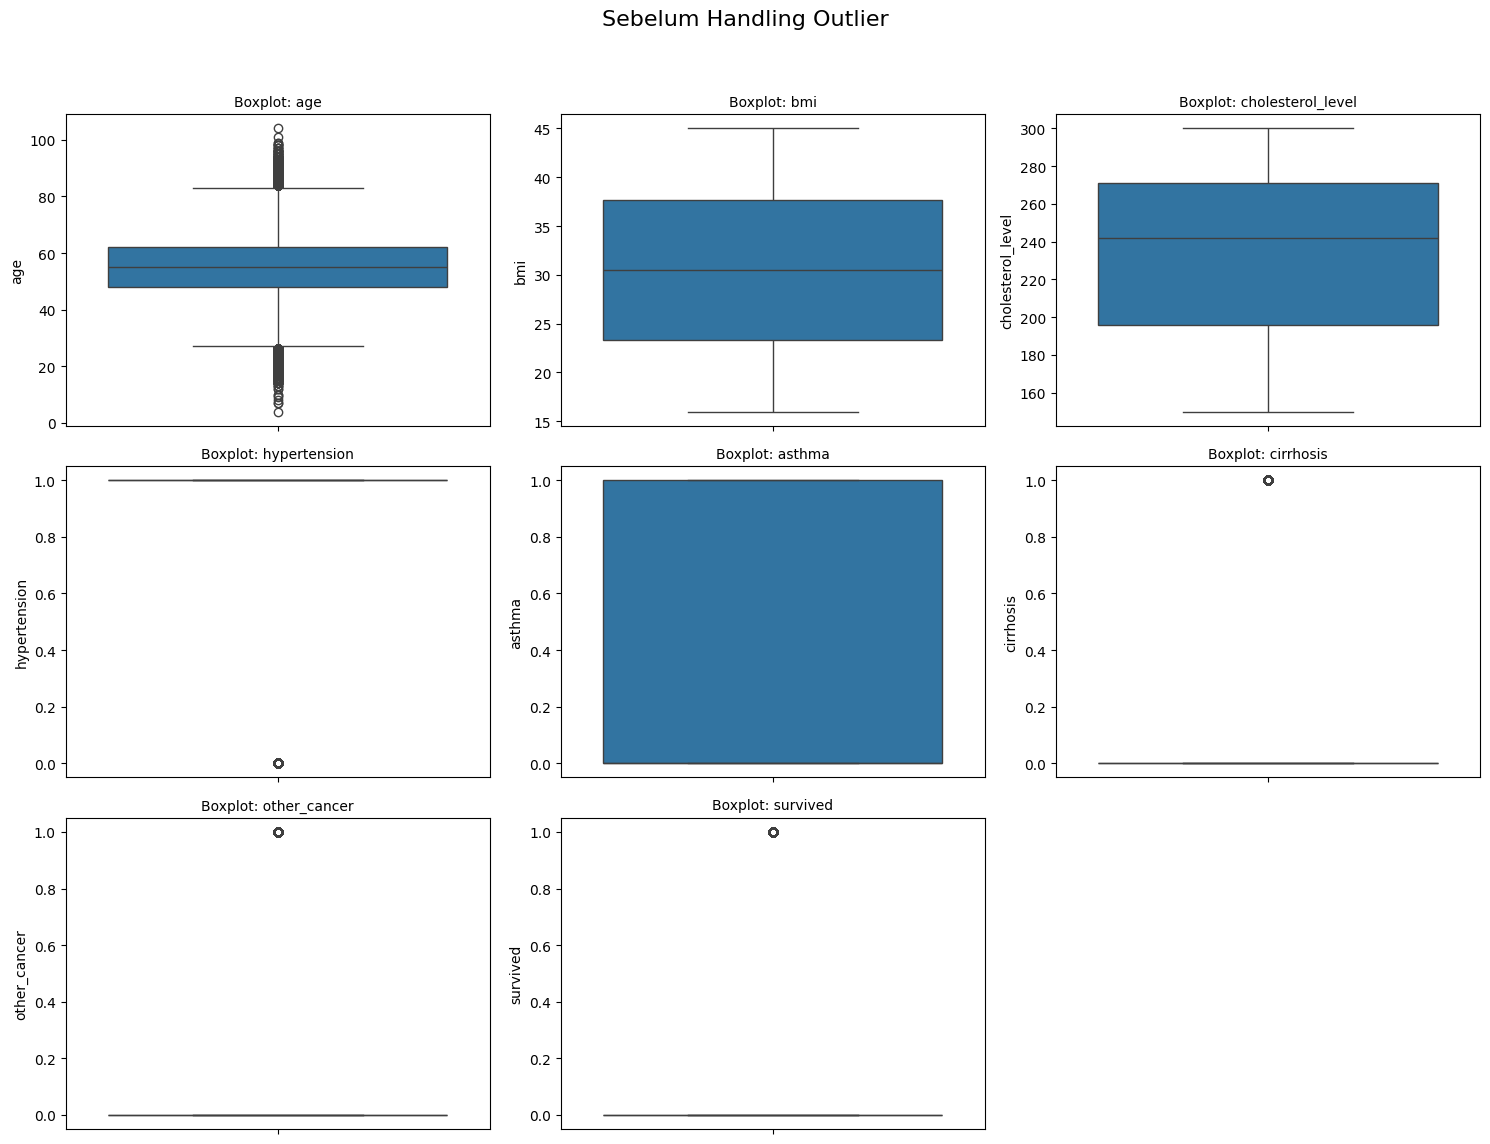

In [8]:
def boxplot_num_cols(df, num_cols, title):
  """
  Menampilkan visualisasi boxplot pada setiap fitur numerik
  """
  n_num_col = len(num_cols) # Jumlah kolom per baris
  cols = 3
  rows = math.ceil(n_num_col/cols)

  # Membuat plot
  fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
  axes = axes.flatten()

  for i, col in enumerate(num_cols):
      sns.boxplot(y=df[col], ax=axes[i])
      axes[i].set_title(f'Boxplot: {col}', fontsize=10)

  # Hapus subplot kosong jika ada
  for j in range(i + 1, len(axes)):
      fig.delaxes(axes[j])

  fig.suptitle(title, fontsize=16)
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Supaya judul utama tidak ketindih
  plt.show()

before_iqr = "Sebelum Handling Outlier"
boxplot_num_cols(df, num_cols, before_iqr)

Berdasarkan visualisasi boxplot di atas, outlier terlihat jelas pada fitur `age`. Sedangkan pada fitur `hypertension`, `cirrhosis`, `other_cancer`, dan `survived` outlier yang terlihat merupakan nilai minoritas pada nilai.


### Univariate Data Analysis: Data Categorical

In [9]:
feature_names = []
unique_values_list = []

for col in cat_cols:
    unique_values = df[col].unique()
    unique_values_list.append(unique_values)
    feature_names.append(col)

df_category_unique = pd.DataFrame({'Feature': feature_names, 'Unique Values': unique_values_list})
df_category_unique

,Feature,Unique Values
0,gender,"[Male, Female]"
1,country,"[Sweden, Netherlands, Hungary, Belgium, Luxemb..."
2,diagnosis_date,"[2016-04-05, 2023-04-20, 2023-04-05, 2016-02-0..."
3,cancer_stage,"[Stage I, Stage III, Stage IV, Stage II]"
4,family_history,"[Yes, No]"
5,smoking_status,"[Passive Smoker, Former Smoker, Never Smoked, ..."
6,treatment_type,"[Chemotherapy, Surgery, Combined, Radiation]"
7,end_treatment_date,"[2017-09-10, 2024-06-17, 2024-04-09, 2017-04-2..."



Distribusi fitur: gender
        Jumlah Sampel  Percent
gender                        
Male           445134     50.0
Female         444866     50.0


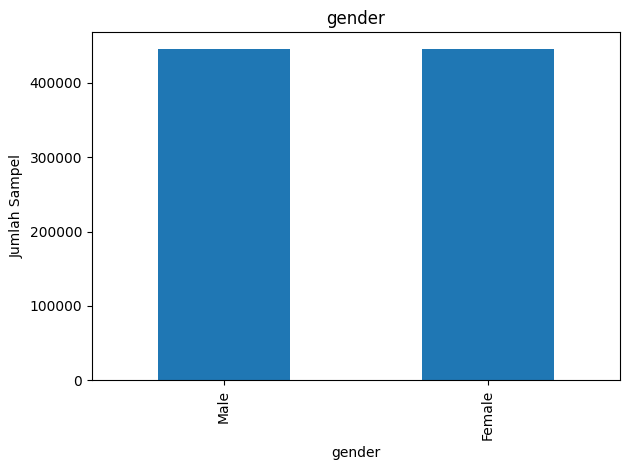


Distribusi fitur: country
                Jumlah Sampel  Percent
country                               
Malta                   33367      3.7
Ireland                 33243      3.7
Portugal                33208      3.7
France                  33199      3.7
Sweden                  33161      3.7
Croatia                 33138      3.7
Greece                  33052      3.7
Spain                   33042      3.7
Netherlands             33040      3.7
Denmark                 33024      3.7
Slovenia                33005      3.7
Belgium                 32986      3.7
Hungary                 32981      3.7
Romania                 32963      3.7
Poland                  32949      3.7
Italy                   32948      3.7
Germany                 32940      3.7
Estonia                 32893      3.7
Czech Republic          32885      3.7
Lithuania               32856      3.7
Slovakia                32853      3.7
Austria                 32832      3.7
Finland                 32798      3.

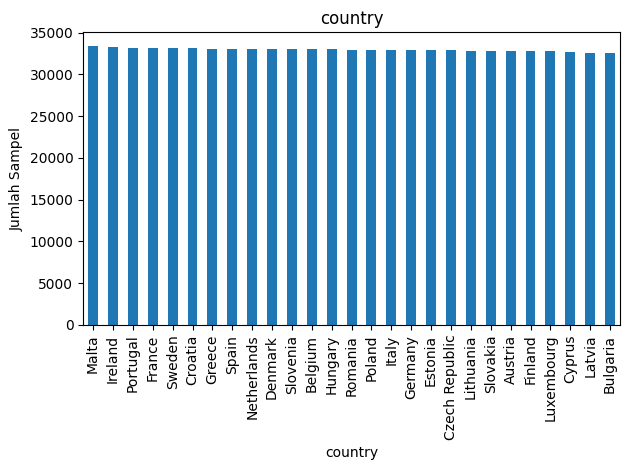


Distribusi fitur: diagnosis_date
                Jumlah Sampel  Percent
diagnosis_date                        
2024-05-15                306      0.0
2022-05-26                303      0.0
2022-05-16                301      0.0
2019-09-16                297      0.0
2017-03-08                296      0.0
...                       ...      ...
2015-09-16                195      0.0
2020-07-03                194      0.0
2023-04-06                194      0.0
2015-08-06                193      0.0
2017-02-03                184      0.0

[3651 rows x 2 columns]


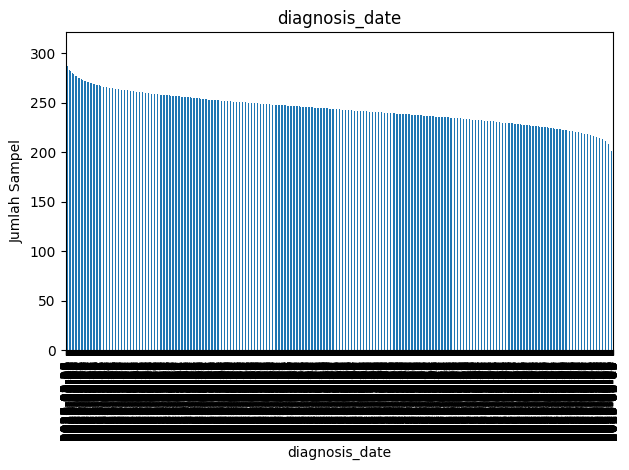


Distribusi fitur: cancer_stage
              Jumlah Sampel  Percent
cancer_stage                        
Stage III            222594     25.0
Stage IV             222527     25.0
Stage I              222516     25.0
Stage II             222363     25.0


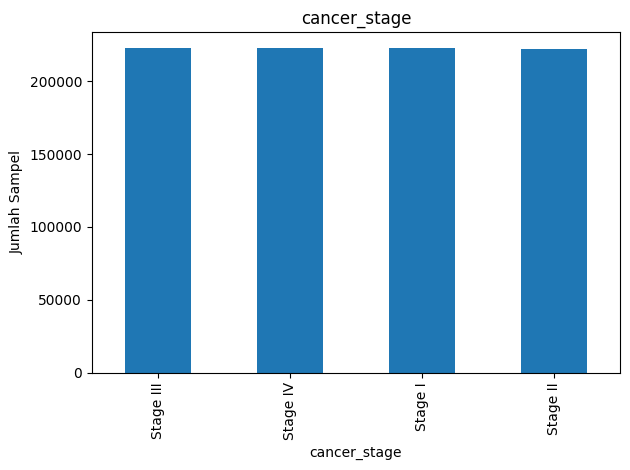


Distribusi fitur: family_history
                Jumlah Sampel  Percent
family_history                        
No                     445181     50.0
Yes                    444819     50.0


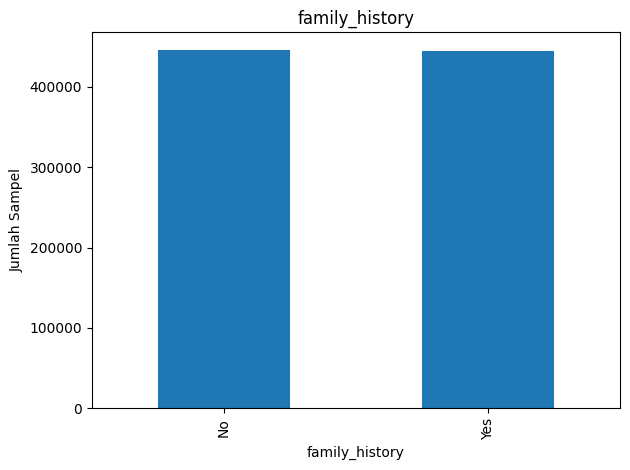


Distribusi fitur: smoking_status
                Jumlah Sampel  Percent
smoking_status                        
Passive Smoker         223170     25.1
Never Smoked           222751     25.0
Former Smoker          222181     25.0
Current Smoker         221898     24.9


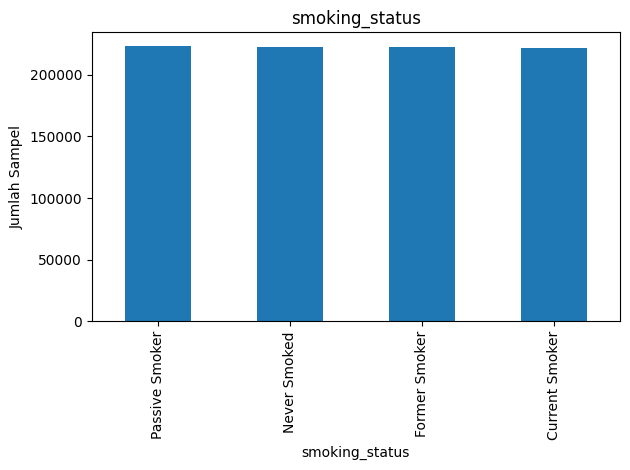


Distribusi fitur: treatment_type
                Jumlah Sampel  Percent
treatment_type                        
Chemotherapy           223262     25.1
Surgery                223261     25.1
Combined               222609     25.0
Radiation              220868     24.8


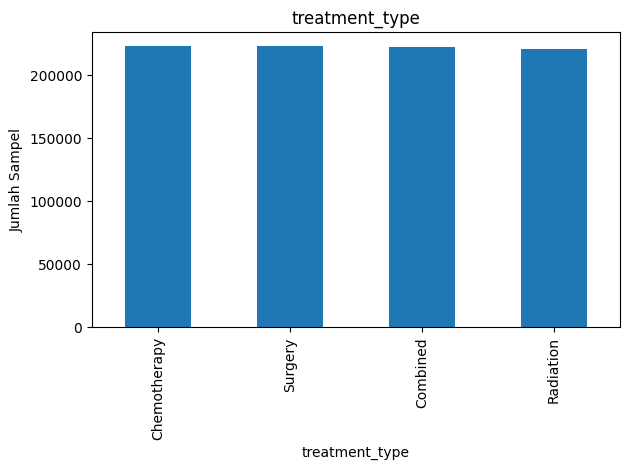


Distribusi fitur: end_treatment_date
                    Jumlah Sampel  Percent
end_treatment_date                        
2023-12-09                    294      0.0
2022-02-22                    290      0.0
2019-07-31                    290      0.0
2017-05-17                    290      0.0
2024-02-07                    289      0.0
...                           ...      ...
2014-12-04                      1      0.0
2026-05-22                      1      0.0
2014-12-02                      1      0.0
2026-05-30                      1      0.0
2014-12-05                      1      0.0

[4194 rows x 2 columns]


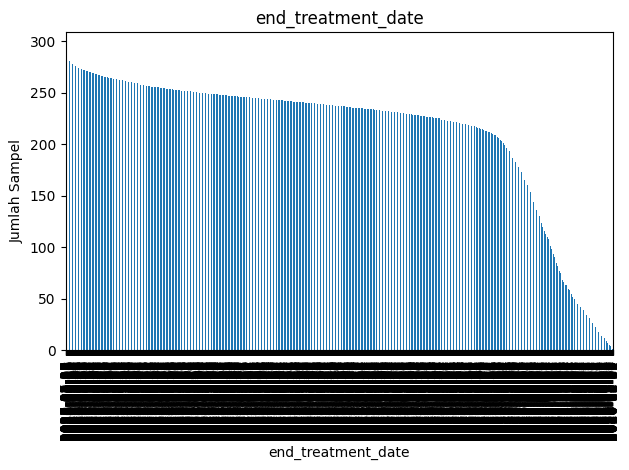

In [10]:
for col in cat_cols:
    count = df[col].value_counts()
    percent = 100 * df[col].value_counts(normalize=True)
    data = pd.DataFrame({'Jumlah Sampel': count, 'Percent': percent.round(1)})

    print(f"\nDistribusi fitur: {col}")
    print(data)

    count.plot(kind='bar', title=col)
    plt.xlabel(col)
    plt.ylabel('Jumlah Sampel')
    plt.tight_layout()
    plt.show()

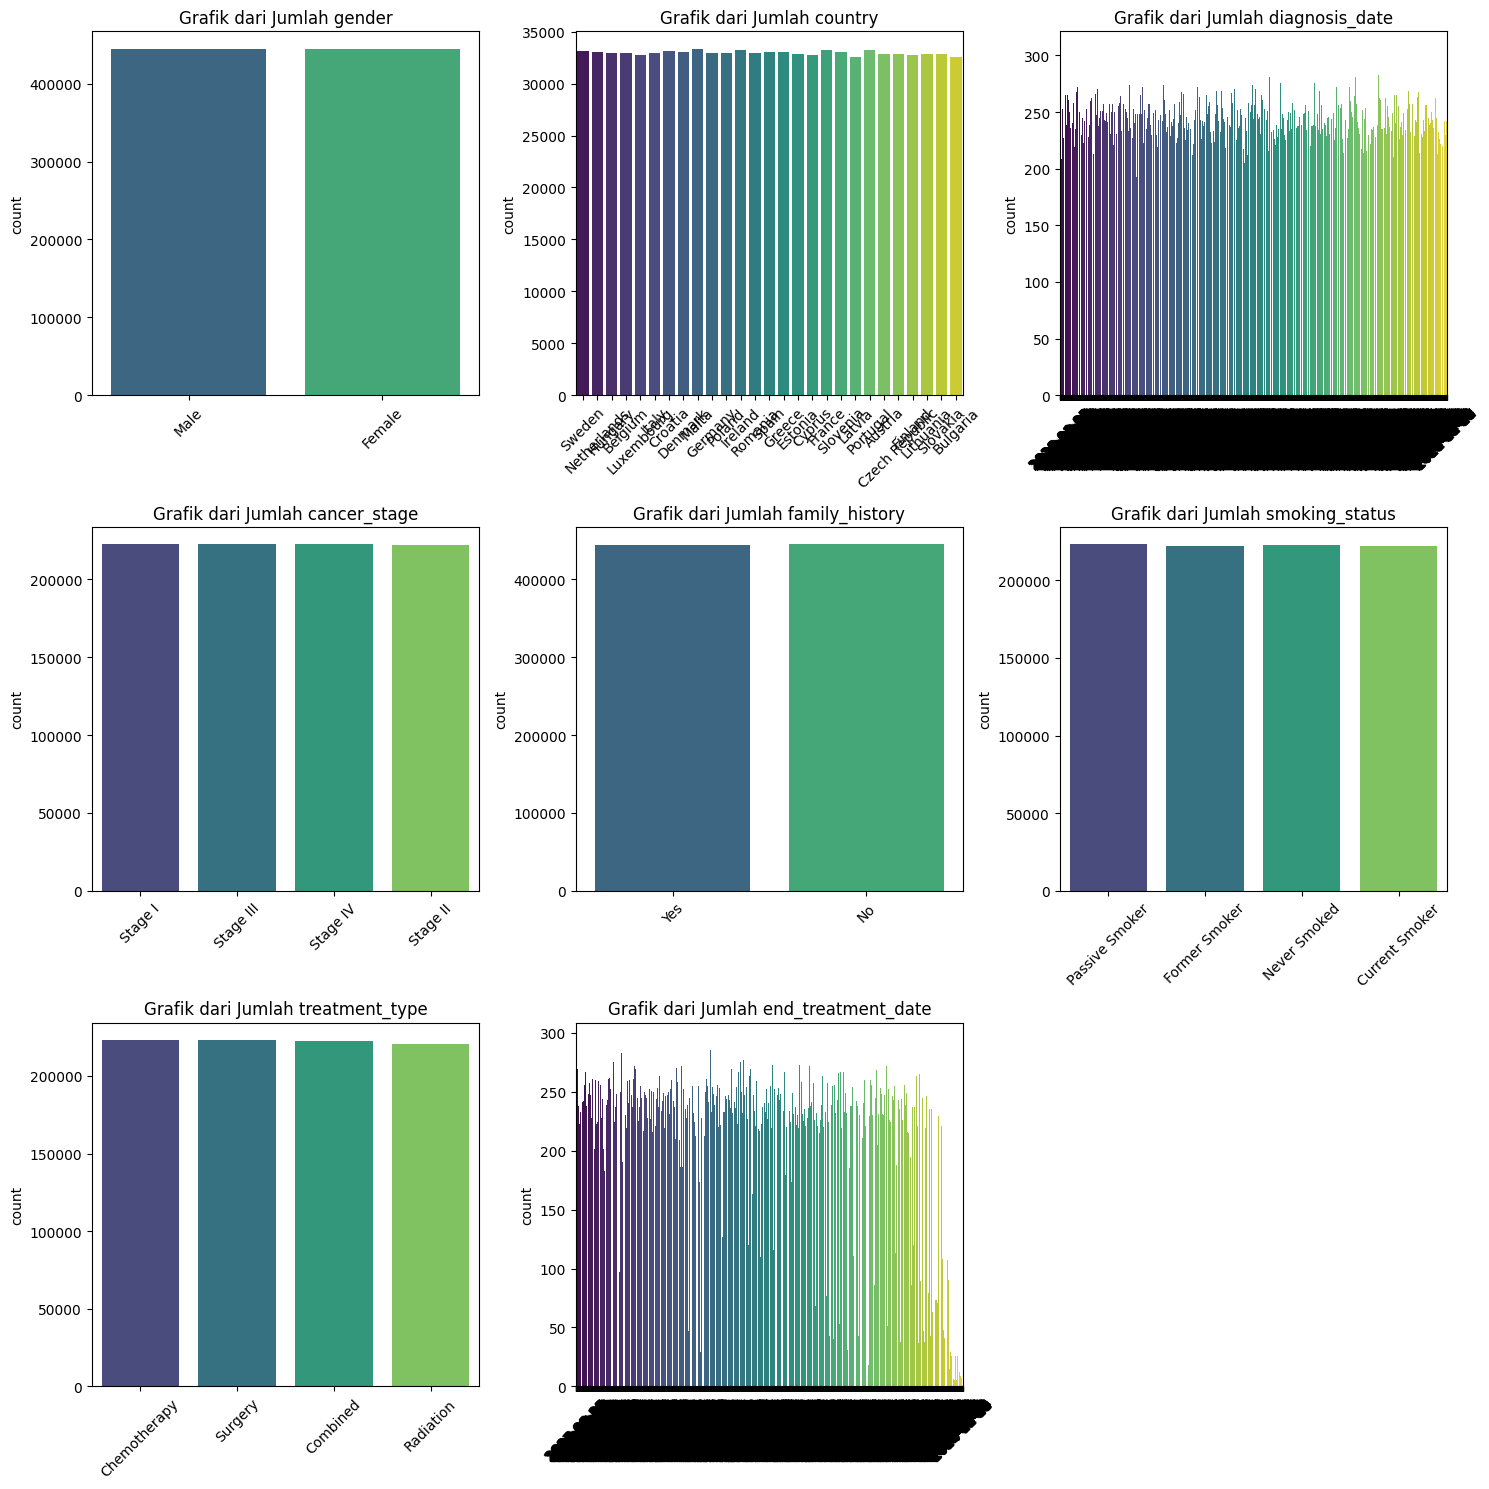

In [11]:
n = len(cat_cols)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 5 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue=col, palette='viridis', legend=False)
    plt.title(f'Grafik dari Jumlah {col}')
    plt.xticks(rotation=45)
    plt.xlabel('')
    plt.ylabel('count')

plt.tight_layout()
plt.show()


Dari Gambar 6, dapat diketahui bahwa:
1. Semua fitur kategorikal memiliki distribusi yang seimbang pada masing-masing nilai uniknya.
2. Pada fitur "gender" pasien laki-laki dan perempuan sama banyaknya.
3. Persebaran negara pada fitur "country" memiliki distribusi yang seimbang atau jumlah pada setiap nilainya sama.
4. Pada fitur "cancer_stage", Sebagian besar pasien kanker paru-paru terdiagnosis pada Stadium IV, diikuti oleh Stadium III, Stadium II, dan paling rendah pada Stadium I.
5. Pasien dengan riwayat anggota keluarga menderita kanker paru-paru memiliki potensi sama besarnya dengan pasien yang keluarganya tidak memiliki riwayat kanker paru-paru.
6. Riwayat kanker paru-paru lebih tinggi pada perokok pasif dan paling rendah pada perokok aktif.
7. Penanganan paling banyak dilakukan pada pasien kanker paru-paru dengan operasi dan kemoterapi, sedangkan yang paling sedikit menggunakan radiasi. Distribusinya pada fitur ini tergolong masih seimbang dan belum bisa menjawab pertanyaan permasalahan pertama dalam hubungan jenis perawatan dengan tingkat keberlangsungan hidup pasien.
8. Pengamatan pertama kali dilakukan pada tahun 2014 yang ditunjukan pada nilai min pada fitur "diagnosis_date".
9. Nilai maksimal "end_treatment_date" terdapat pada tahun 2026, sedangkan proyek saat ini dikerjakan pada tahun 2025. Terdapat kecurigaan salah input pada data.

### Univariate Data Exploration: Data Numeric

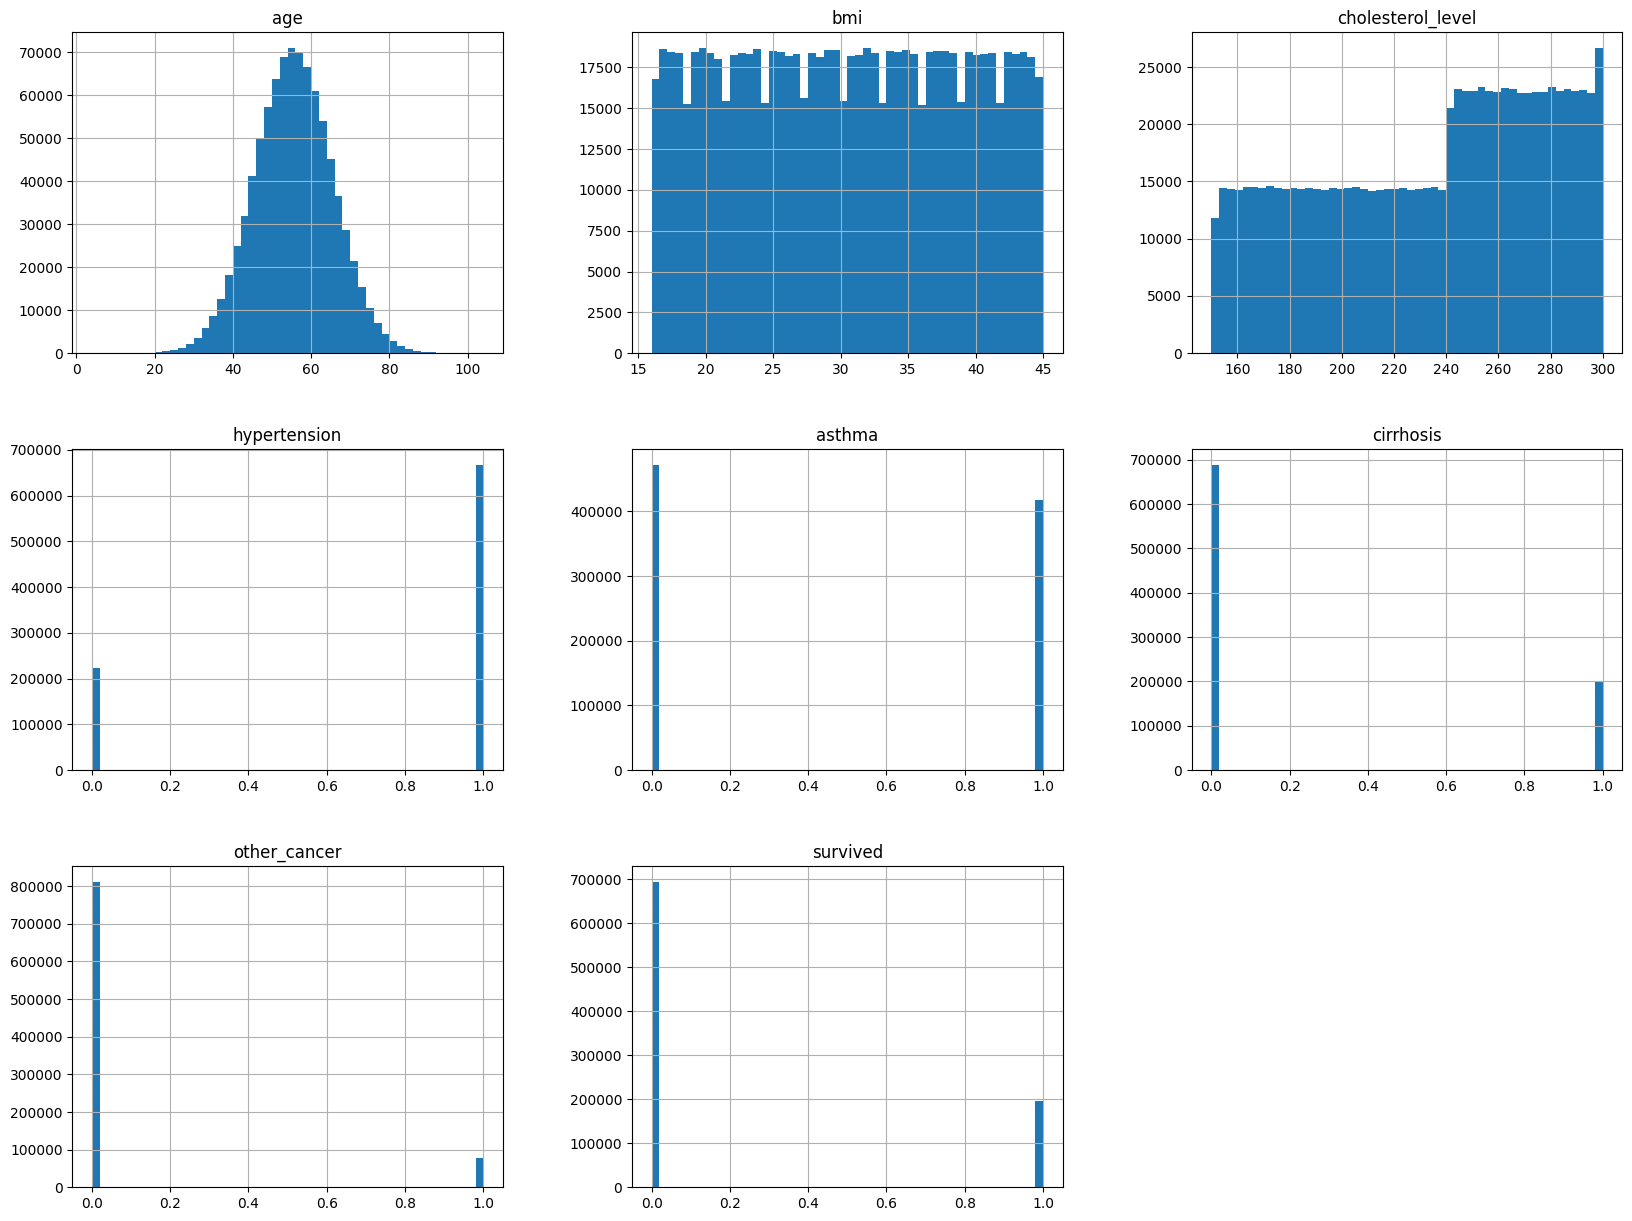

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari grafik di atas, dapat diketahui bahwa:
1. Disrtibusi pada fitur `age` merupakan distribusi normal dan menunjukkan kenaikan nilai di beberapa angka.
2. Distribusi pada fitur `diagnosis_date` menyebar dan mengalami penurunan pasien setelah tahun 2022. Bisa dikatakan persebaran sedikit miring ke kiri atau left-skewd.
3. Persebaran pada fitur `bmi` distribusinya merata diantara 18-45 dan menunjukkan variasi yang luas.
4. Pada fitur `colesterol_level` distribusi memiliki dua puncak atau bimodal setelah nilai sekitar 240. Bisa dikategorikan terdapat kelompok dengan risiko kolesterol tinggi.
4. Pada fitur `hypertension`, `asthma`, `cirrhosis`, `other_cancer` dan `survived` merupakan variabel biner dengan nilai 0 (tidak memiliki kondisi tersebut) dan 1 (memiliki kondisi tersebut). Dapat disimpulkan bahwa:
- `hypertension`, lebih banyak pasien dengan kondisi tekanan darah tinggi (nilai 1 paling tinggi).
- `asthma`, sebagian besar pasien tidak memiliki penyakit asma.
- `cirrhosis`, hanya sebagian kecil pasien memiliki kondisi ini.
- `other_cancer`, hanya sebagian kecil pasien memiliki kondisi ini.
- `survived`, mayoritas pasien tidak bertahan hidup (nilai 0 paling tinggi).

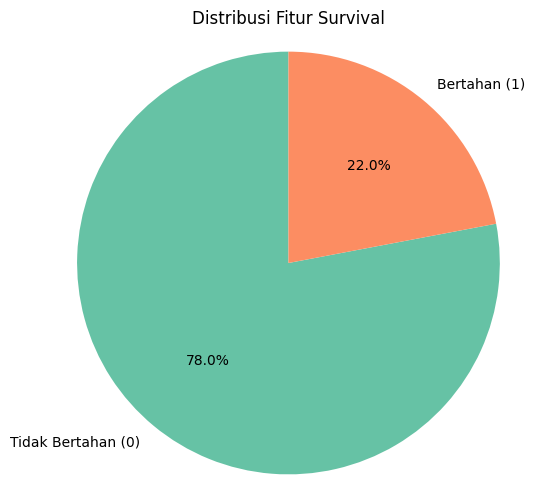

In [13]:
survival_counts = df['survived'].value_counts().sort_index()

# Label bisa disesuaikan kalau ingin lebih informatif
labels = ['Tidak Bertahan (0)', 'Bertahan (1)']

# Pie chart
plt.figure(figsize=(6, 6))
# colors = plt.cm.viridis(np.linspace(0, 1, len(survival_counts)))
plt.pie(survival_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set2"))
plt.title('Distribusi Fitur Survival')
plt.axis('equal')
plt.show()

### Multivariate Data

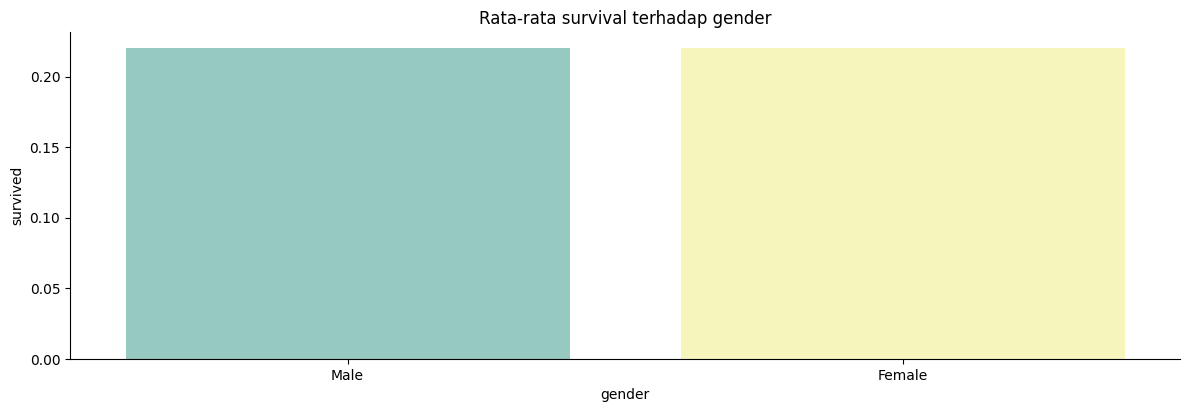

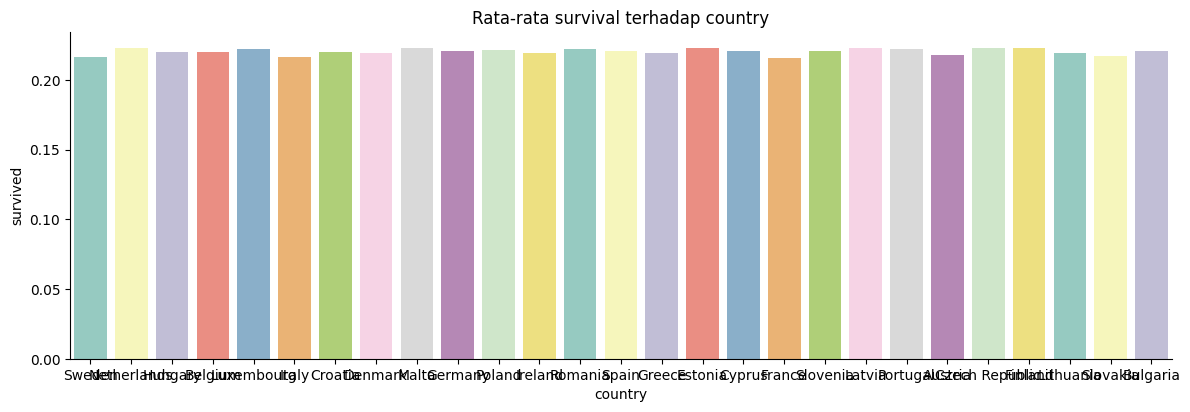

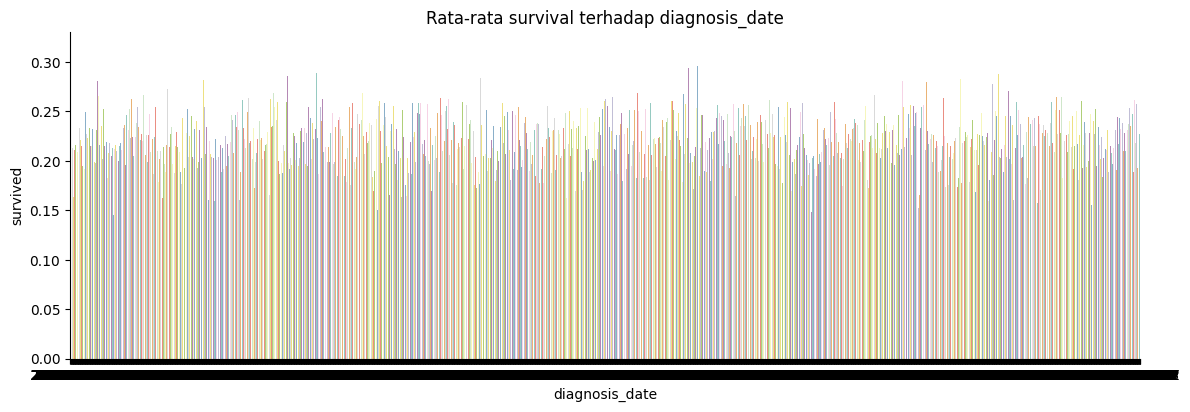

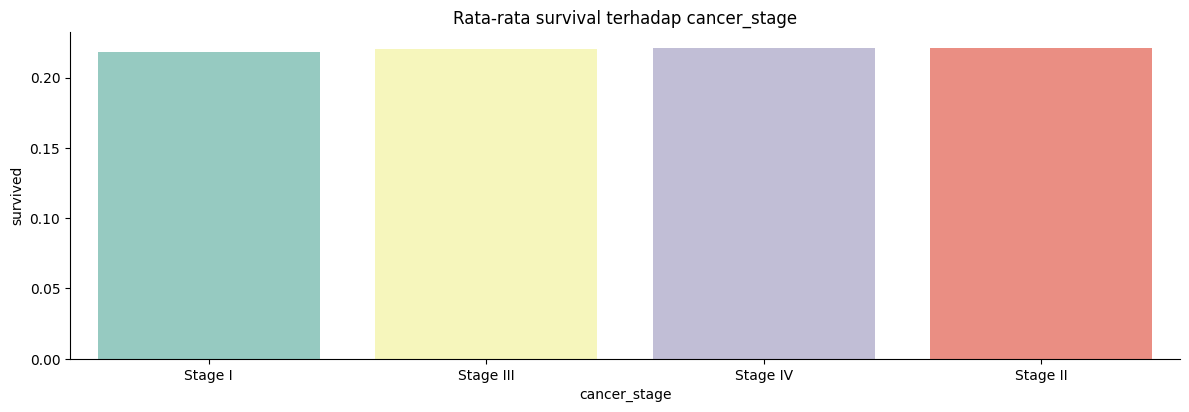

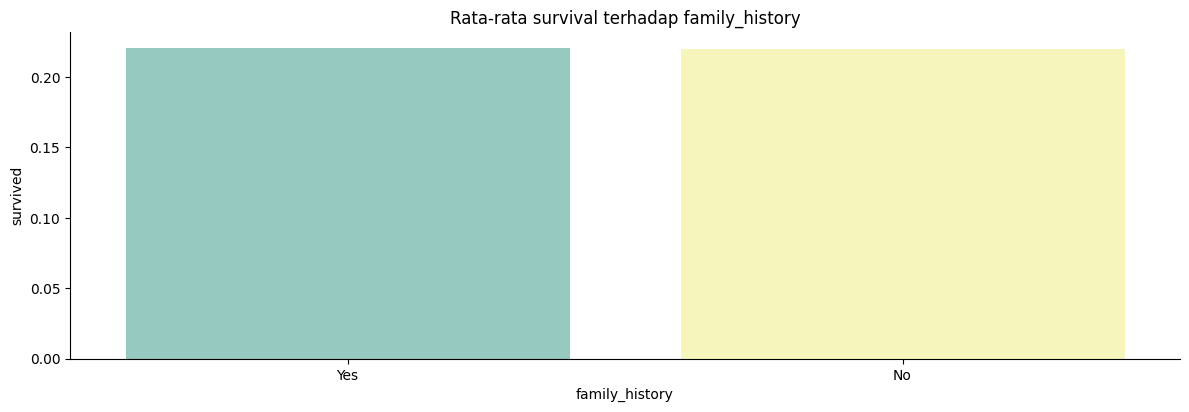

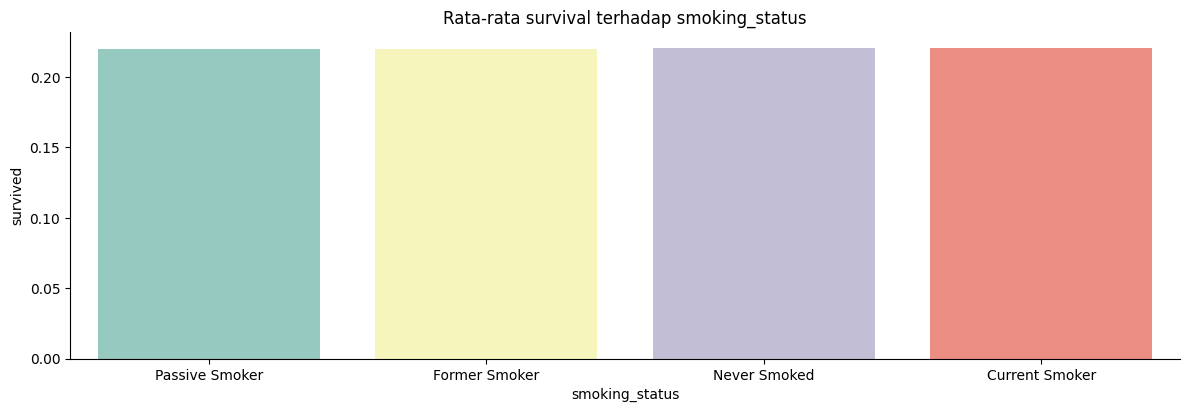

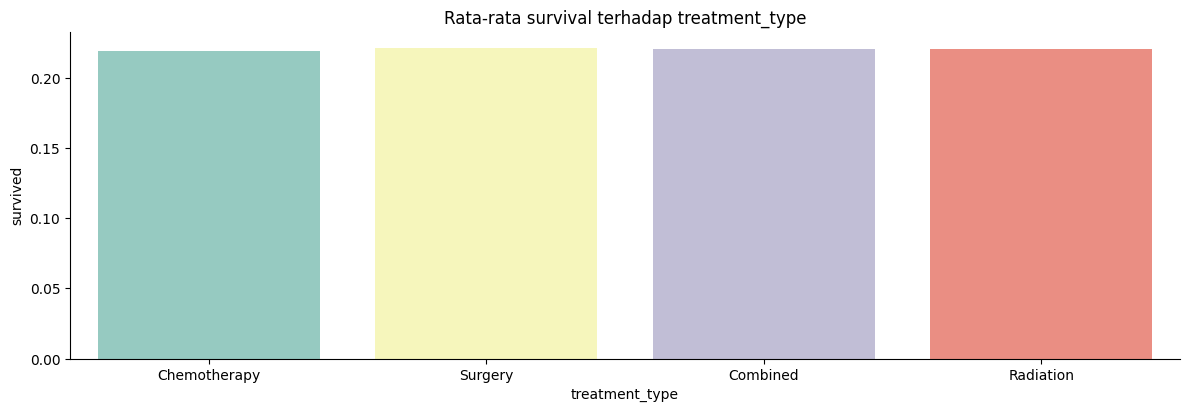

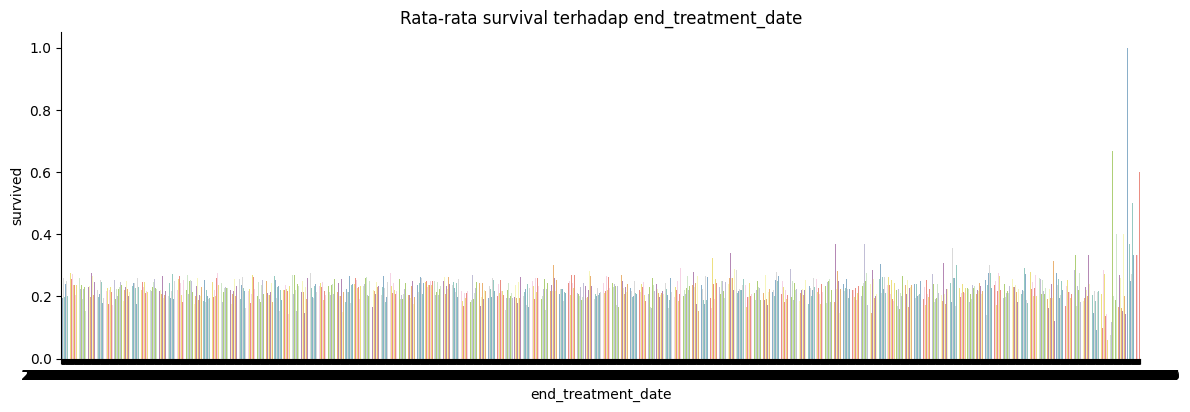

In [14]:
cat_features = cat_cols.to_list()
for col in cat_features:
    sns.catplot(x=col, y='survived', data=df, kind="bar", hue=col, legend=False, errorbar=None,
                dodge=False, height=4, aspect=3, palette="Set3")
    plt.title(f"Rata-rata survival terhadap {col}")
    plt.show()

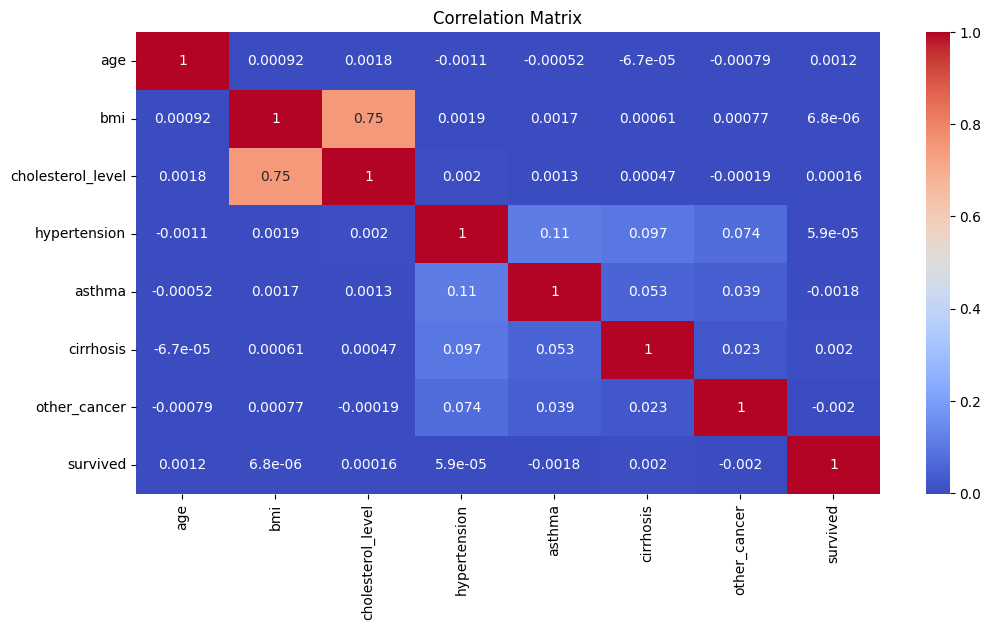

In [15]:
# Correlation matrix
plt.figure(figsize=(12,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Dari matriks korelasi di atas, diketahui bahwa hubungan atau korelasi yang tinggi terdapat pada fitur `colestreol_level` dengan `bmi` dengan nilai 0,75.

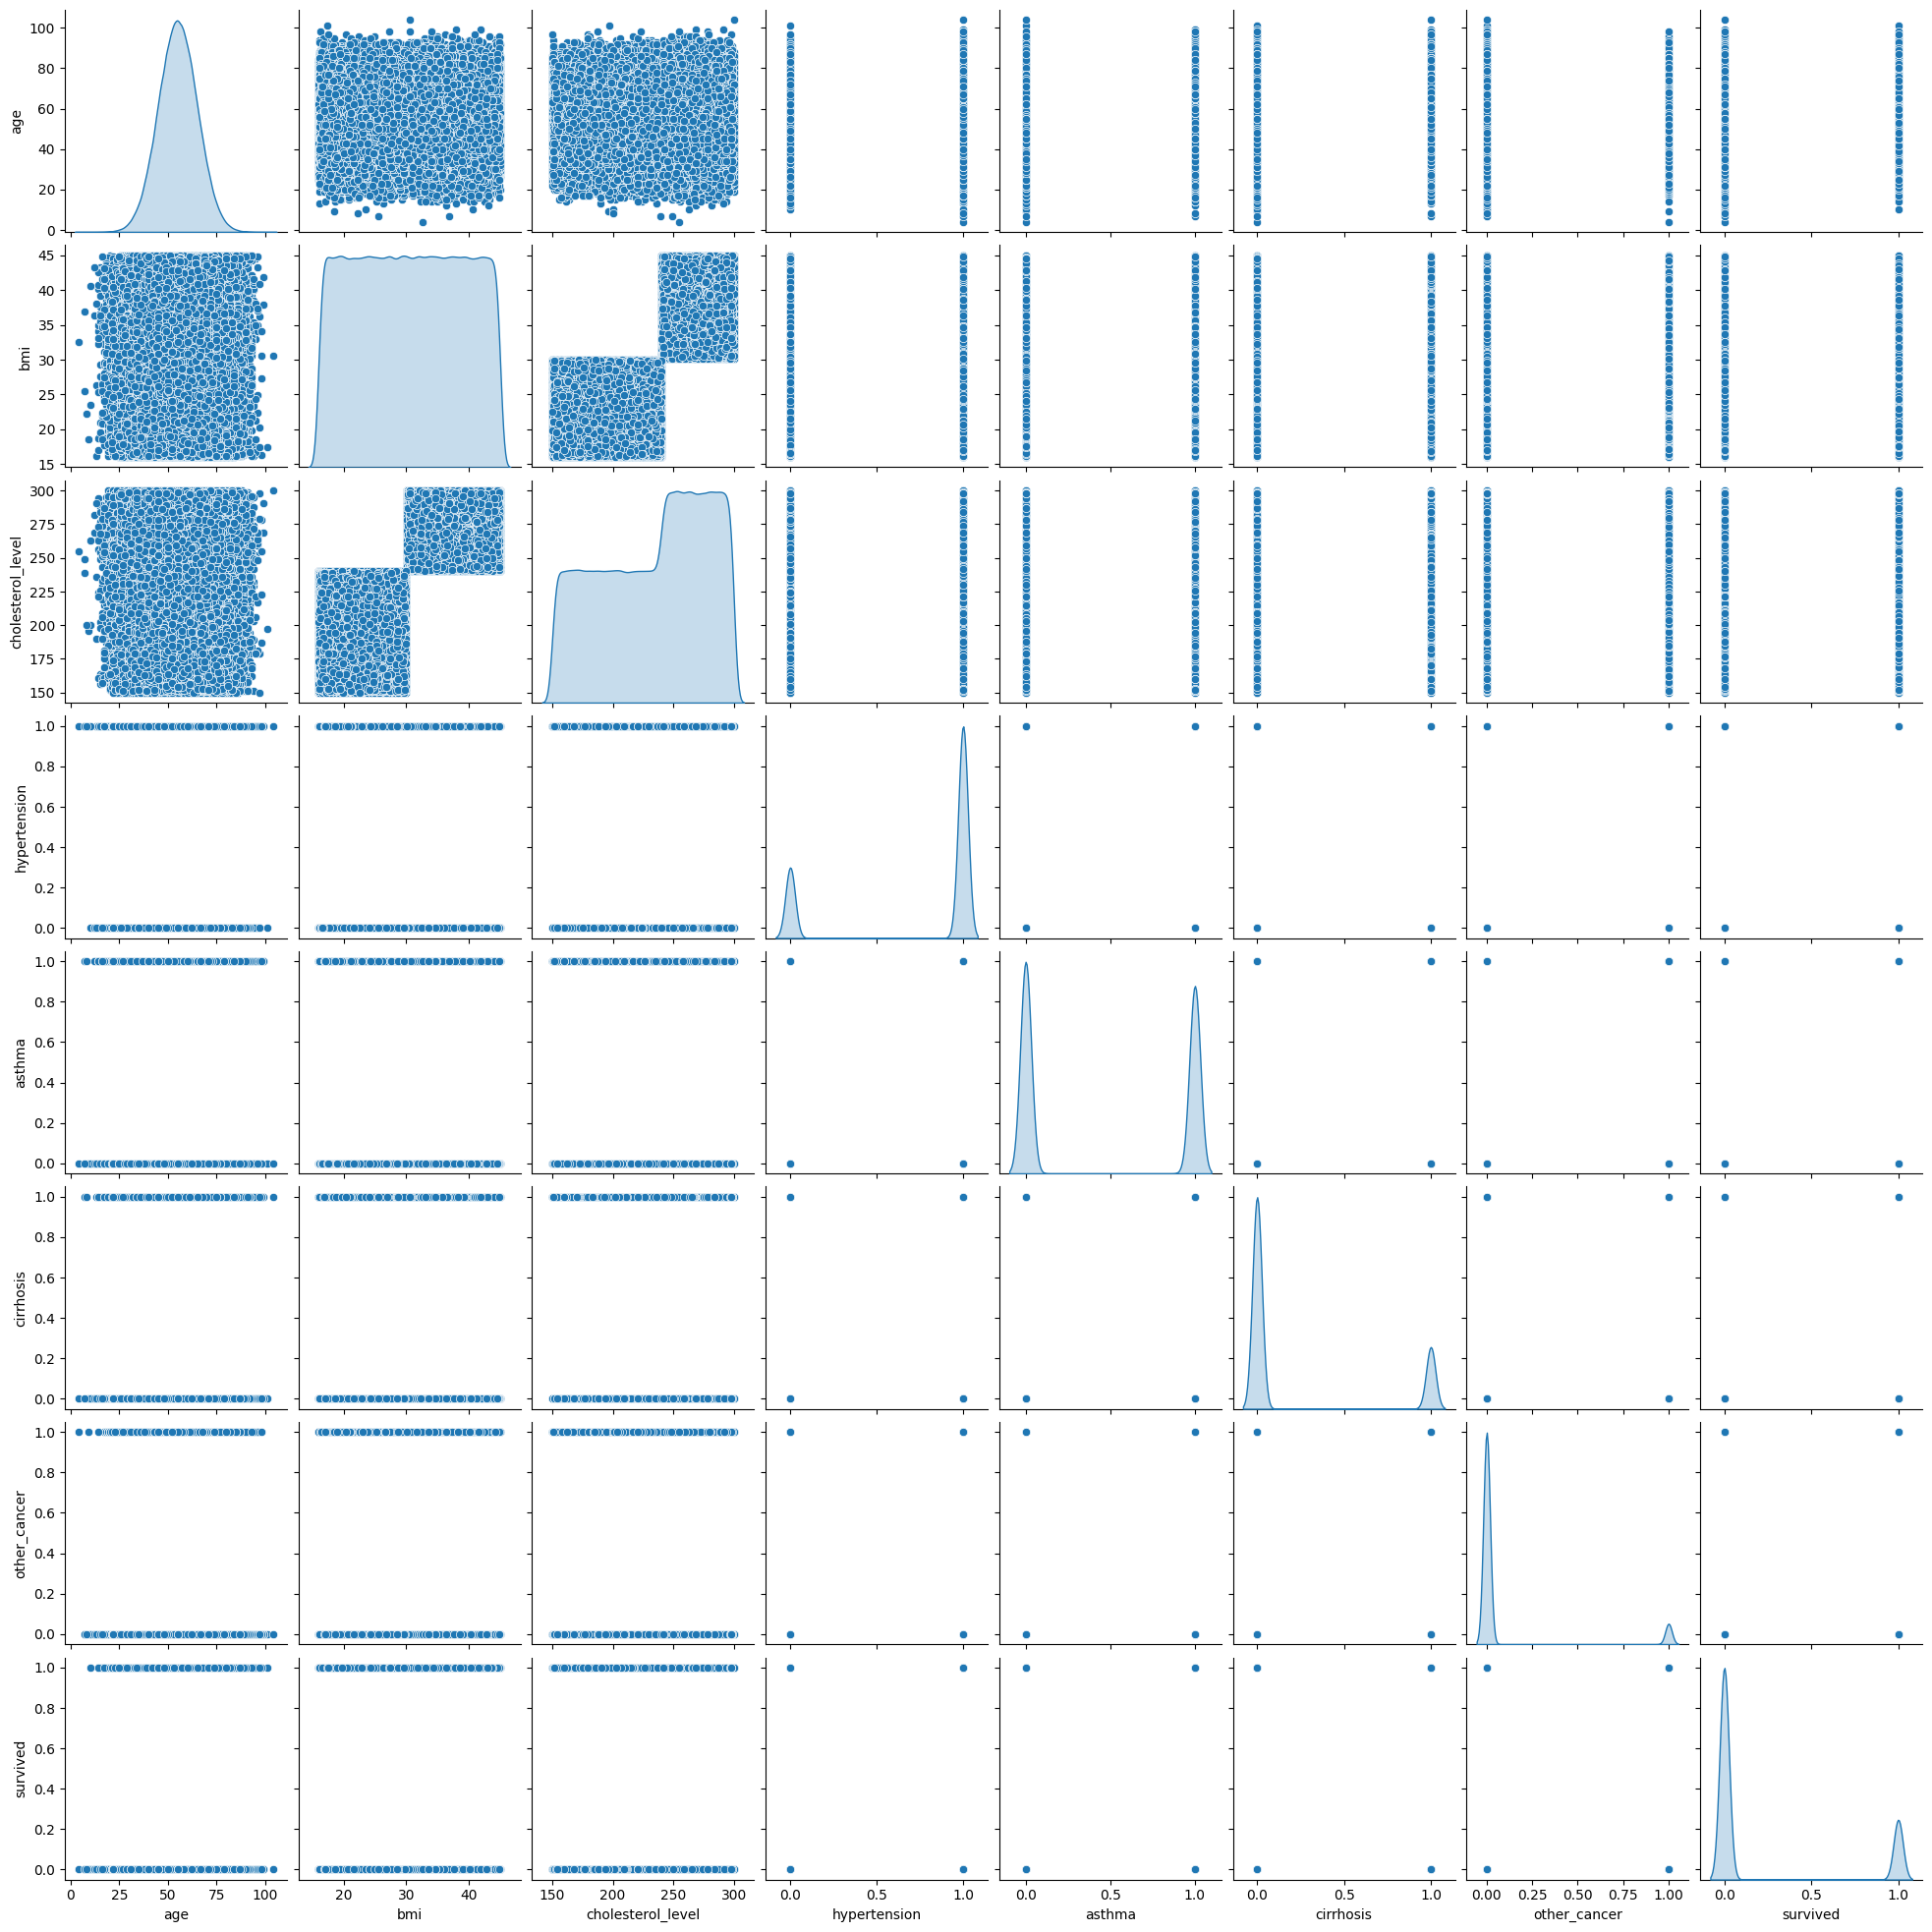

In [16]:
# Mengamati hubungan pada fitur numerik
sns.pairplot(df, diag_kind='kde')

Fungsi pairplot di atas menjukkan relasi pasangan dalam dataset. Diketahui bahwa:
1. Distribusi pada fitur `age` merupakan distribusi normal.
2. Korelasi fitur `colesterol_level` dengan `bmi` menunjukkan miring ke kanan atau right-skewd menunjukkan bahwa korelasi yang positif terjadi di antara kedua fitur tersebut.
3. Selain dari dari ketiga fitur di atas, merupakan fitur kategorikal yang diubah menjadi numerik sehingga korelasinya merupakan garis lurus.
4. Dapat dipastikan, karakteristik dataset merupakan non-linear dan tersebar.

## 4. Data Preparation
### Memastikan Tipe Data Datetime
Sebelumnya data mengandung tanggal merupakan tipe data object dan diubah menjadi tipe data datetime.

In [17]:
# Memastikan tipe data datetime
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'], errors='coerce', format='%Y-%m-%d')
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'], errors='coerce', format='%Y-%m-%d')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   age                 890000 non-null  float64       
 1   gender              890000 non-null  object        
 2   country             890000 non-null  object        
 3   diagnosis_date      890000 non-null  datetime64[ns]
 4   cancer_stage        890000 non-null  object        
 5   family_history      890000 non-null  object        
 6   smoking_status      890000 non-null  object        
 7   bmi                 890000 non-null  float64       
 8   cholesterol_level   890000 non-null  int64         
 9   hypertension        890000 non-null  int64         
 10  asthma              890000 non-null  int64         
 11  cirrhosis           890000 non-null  int64         
 12  other_cancer        890000 non-null  int64         
 13  treatment_type      890000 no

#### Filtered Data
Sebelumnya, terdapat data tanggal (pada fitur datetime) yang tidak valid karena melebihi waktu unggahan dataset pada tahun sebelumnya. Oleh karena itu, proyek ini hanya mengambil data dengan tanggal sebelum 31 Desember 2024.

In [18]:
filtered_df = df[(df['diagnosis_date'] < pd.to_datetime('2024-12-31')) & (df['end_treatment_date'] < pd.to_datetime('2024-12-31'))]

df = filtered_df.copy()
print('Ukuran dataset : ', df.shape)

Ukuran dataset :  (829975, 16)


#### Handling Outlier

Pada eksplorasi data sebelumnya, terdapat outlier pada fitur `age`, maka dari itu akan dilakukan proses penangan outlier menggunakan Interquantile Rage atau IQR.

In [19]:
# Handling outlier using IQR
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

filter_outiers = ~((df['age'] < (Q1 - 1.5 * IQR)) | (df['age'] > (Q3 + 1.5 * IQR)))
df = df[filter_outiers].reset_index(drop=True)

print('Ukuran dataset setelah handling outlier', df.shape)

Ukuran dataset setelah handling outlier (826352, 16)


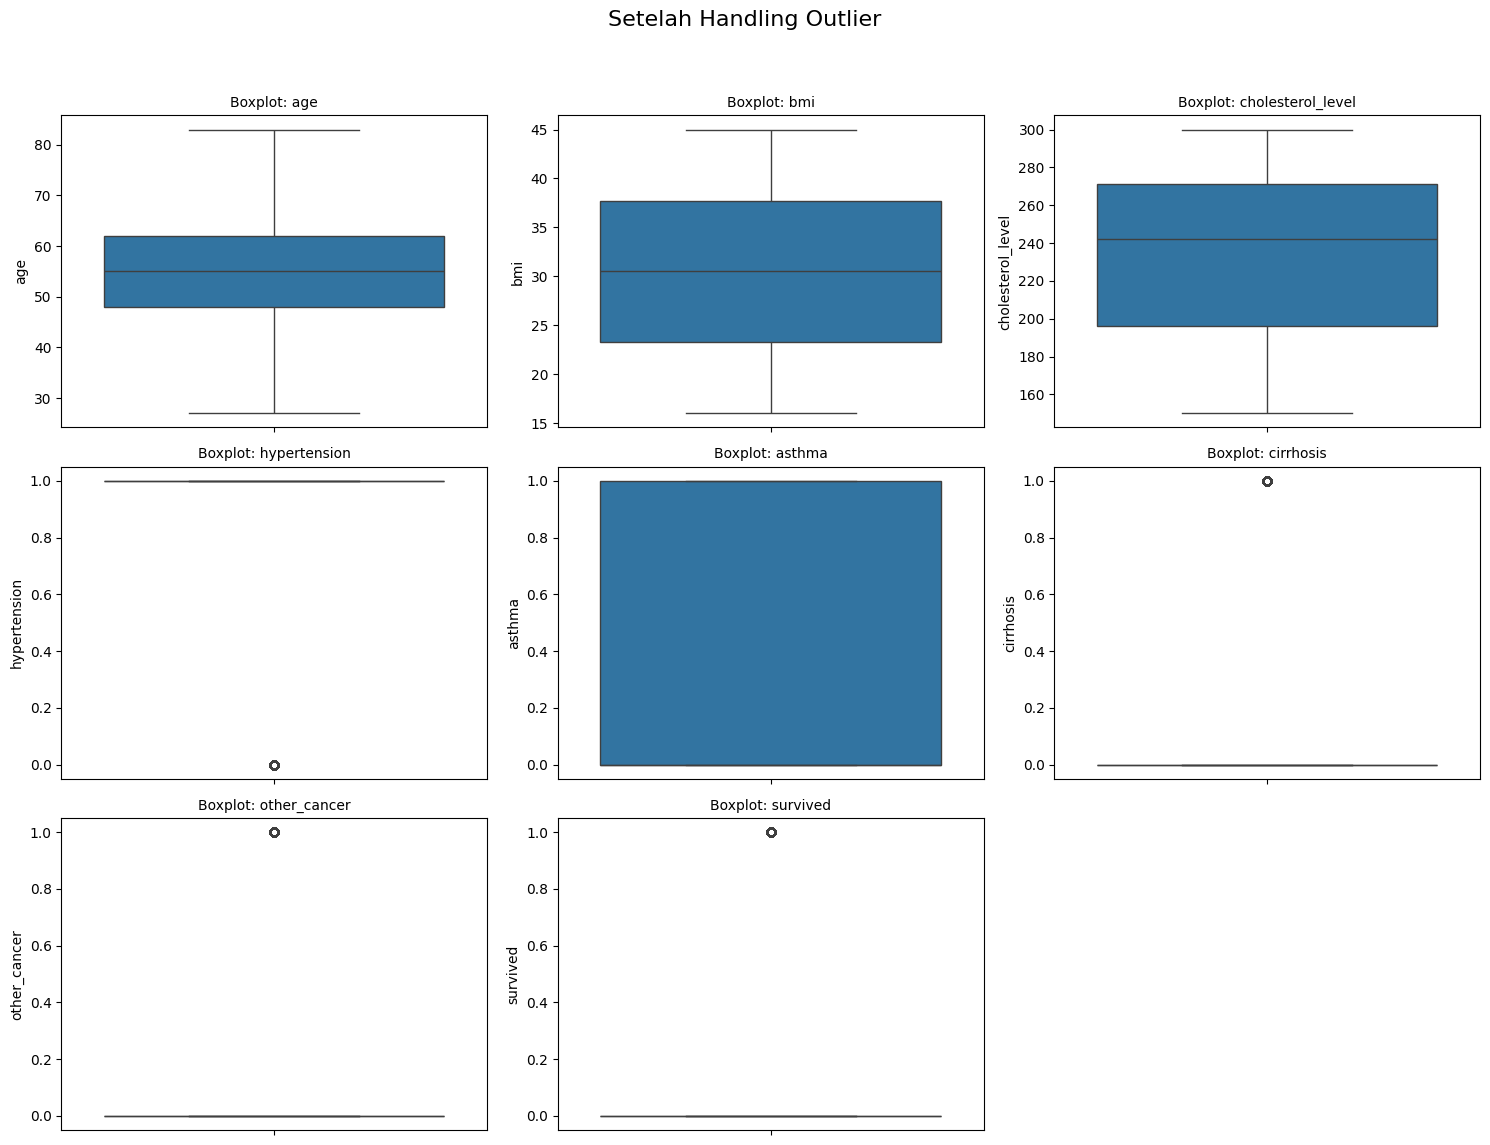

In [20]:
after_IQR = "Setelah Handling Outlier"
boxplot_num_cols(df, num_cols, after_IQR)

In [21]:
df.describe()

,age,diagnosis_date,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,end_treatment_date,survived
count,826352.000000,826352,826352.000000,826352.000000,826352.000000,826352.000000,826352.000000,826352.000000,826352,826352.000000
mean,55.007879,2019-02-01 18:55:22.891939584,30.494140,233.639398,0.750146,0.469822,0.225860,0.088287,2020-04-29 04:36:30.307277824,0.220279
min,27.000000,2014-06-02 00:00:00,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,2014-12-02 00:00:00,0.000000
25%,48.000000,2016-10-01 00:00:00,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,2018-01-02 00:00:00,0.000000
50%,55.000000,2019-01-31 00:00:00,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,2020-05-03 00:00:00,0.000000
75%,62.000000,2021-05-30 00:00:00,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,2022-08-31 00:00:00,0.000000
max,83.000000,2024-05-30 00:00:00,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,2024-12-30 00:00:00,1.000000
std,9.795605,NaN,8.367316,43.430160,0.432928,0.499089,0.418148,0.283712,NaN,0.414435


Setelah penanganan outlier dilakukan, didapatkan informasi:
1. Rata-rata umur penderita berada di rentang 48-62. Dapat disimpulkan tidak ada outlier.
2. Indeks masa tubuh atau `bmi` pasien rata-rata berada di rentang 23-38.
3. Rata-rata rentang nilai kolesterol pasien berada di rentang 196-271.
4. Akhir masa perawatan berada pada tanggal 30 Desember 2024.



### Feature Engineering
Menambahkan beberapa fitur yang mungkin relevan agar model dapat memberikan klasifikasi dengan performa yang baik. Nerikut fitur yang akan ditambahkan:
1. `survival_months`, merupakan selisih dari `diagnosis_date` dengan `end_treatment_date` yang disajikan dalam bentuk bulan.
2. `survival_group`, hasil binning dari `survival_months` yang disajikan dalam bentuk interval 2 tahun.
3. `age_group`, hasil binning dari `age` dengan membagi menjadi rentang puluhan, misalnya usia 20an, 30an, dan seterusnya.
4. `cholesterol_group`, hasil binning dari `cholesterol_level` yang dibagi menjadi Normal jika di bawah angka 200 dan High jika kadar kolesterol di atas 200.
5. `bmi_group`, hasil binning dari `bmi` yang dibagi menjadi Underweight (<18), Normal (18,5-24,9), dan Overwight (>25).

In [22]:
# Feature engineering dengan teknik bining pada fitur age, cholesterol_level, dan bmi

bins_age = [20, 30, 40, 50, 60, 70, 80, 90]
labels_age = ['20an', '30an', '40an', '50an', '60an', '70an', '80an']

bins_survival = [0, 24, 48, 72, 96, 120, 144]
survival_labels = ['0-2 Years', '2-4 Years', '4-6 Years', '6-8 Years', '8-10 Years', '10-12 Years']
duration_of_treatment = df['end_treatment_date'] - df['diagnosis_date']

bins_colesterol = [0, 200, 300]
labels_colesterol = ['Normal', 'High']

bins_bmi = [0, 18.5, 24.9, 50]
labels_bmi = ['Underweight', 'Normal', 'Overweight']

df['survival_months'] = round(duration_of_treatment.dt.days / 30)
df['survival_group'] = pd.cut(df['survival_months'], bins=bins_survival, labels=survival_labels, right=False)
df['age_group'] = pd.cut(df['age'], bins=bins_age, labels=labels_age, right=False)
df['cholesterol_group'] = pd.cut(df['cholesterol_level'], bins=bins_colesterol, labels=labels_colesterol, right=False)
df['bmi_group'] = pd.cut(df['bmi'], bins=bins_bmi, labels=labels_bmi, right=False)

df

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,...,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived,survival_months,survival_group,age_group,cholesterol_group,bmi_group
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,...,1,0,Chemotherapy,2017-09-10,0,17.0,0-2 Years,60an,Normal,Overweight
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,...,0,0,Surgery,2024-06-17,1,14.0,0-2 Years,50an,High,Overweight
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,...,0,0,Combined,2024-04-09,0,12.0,0-2 Years,60an,High,Overweight
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,...,0,0,Chemotherapy,2017-04-23,0,15.0,0-2 Years,50an,High,Overweight
4,50.0,Male,Italy,2023-01-02,Stage I,No,Never Smoked,37.6,274,1,...,0,0,Radiation,2024-12-27,0,24.0,2-4 Years,50an,High,Overweight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826347,40.0,Male,Malta,2022-07-01,Stage IV,No,Passive Smoker,44.8,243,1,...,1,0,Radiation,2023-02-23,0,8.0,0-2 Years,40an,High,Overweight
826348,62.0,Female,Cyprus,2015-09-27,Stage II,Yes,Former Smoker,21.6,240,0,...,0,0,Surgery,2017-06-19,0,21.0,0-2 Years,60an,High,Normal
826349,48.0,Female,Estonia,2016-03-27,Stage III,Yes,Never Smoked,38.6,242,1,...,0,0,Combined,2017-01-23,1,10.0,0-2 Years,40an,High,Overweight
826350,67.0,Female,Slovakia,2015-12-22,Stage IV,Yes,Former Smoker,18.6,194,1,...,0,0,Chemotherapy,2017-12-12,0,24.0,2-4 Years,60an,Normal,Normal


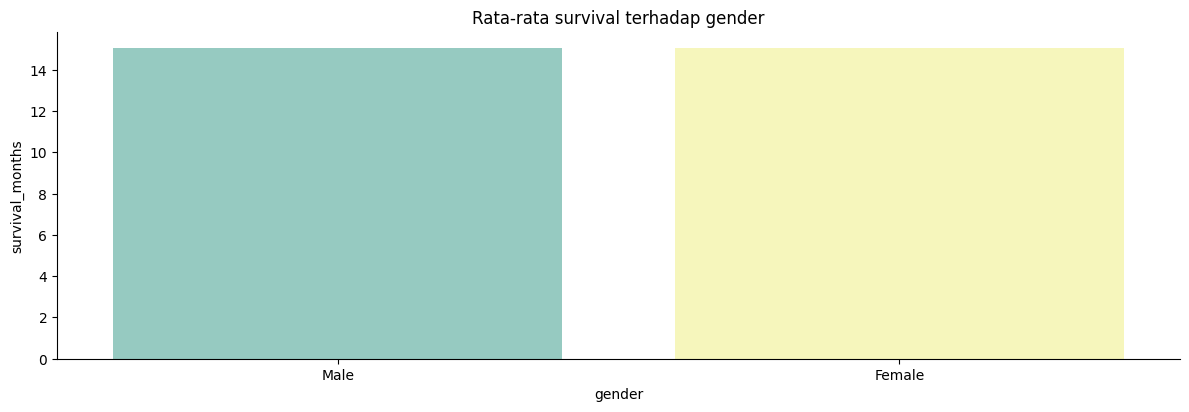

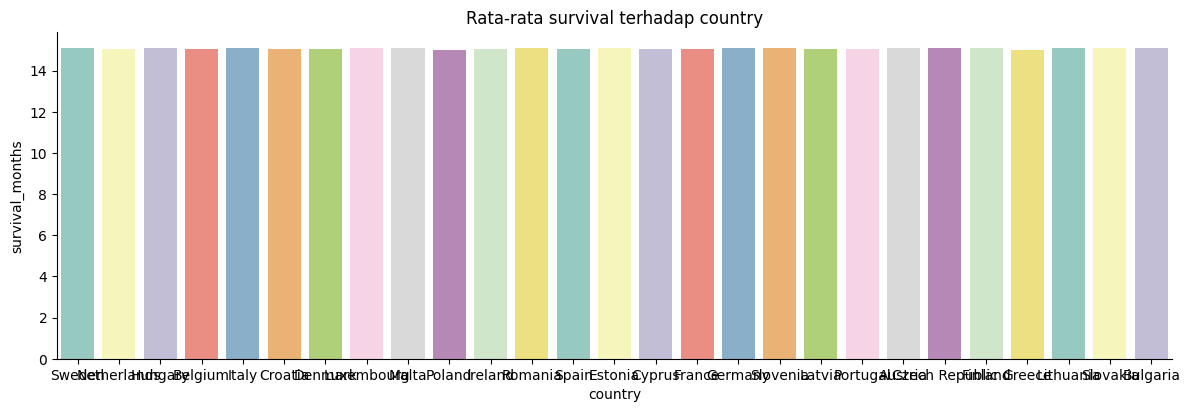

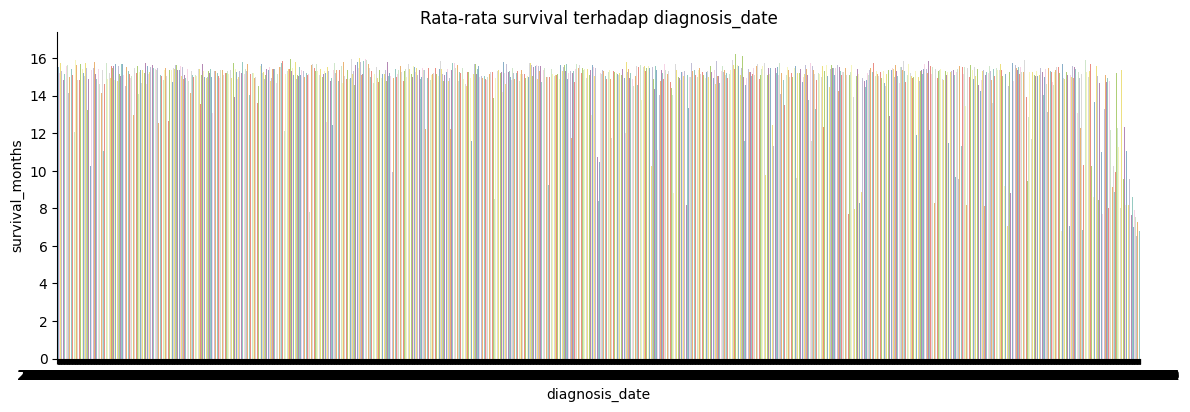

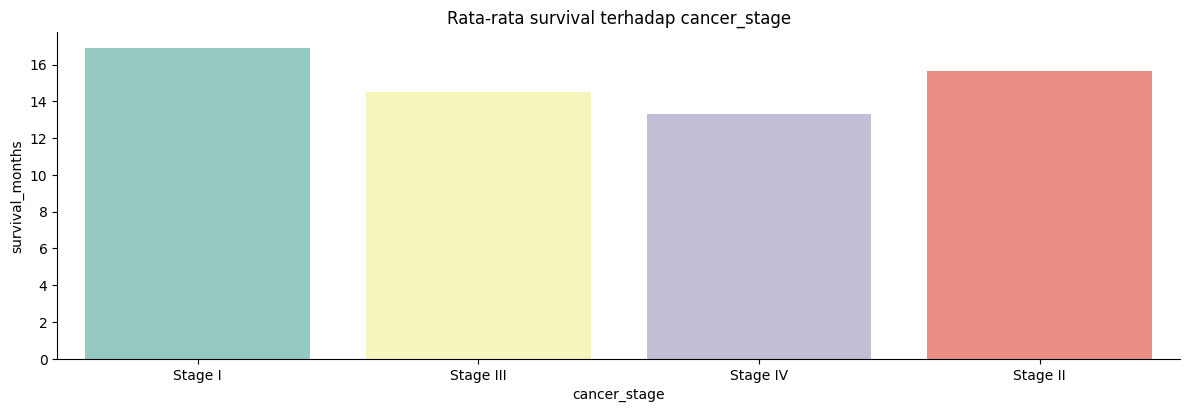

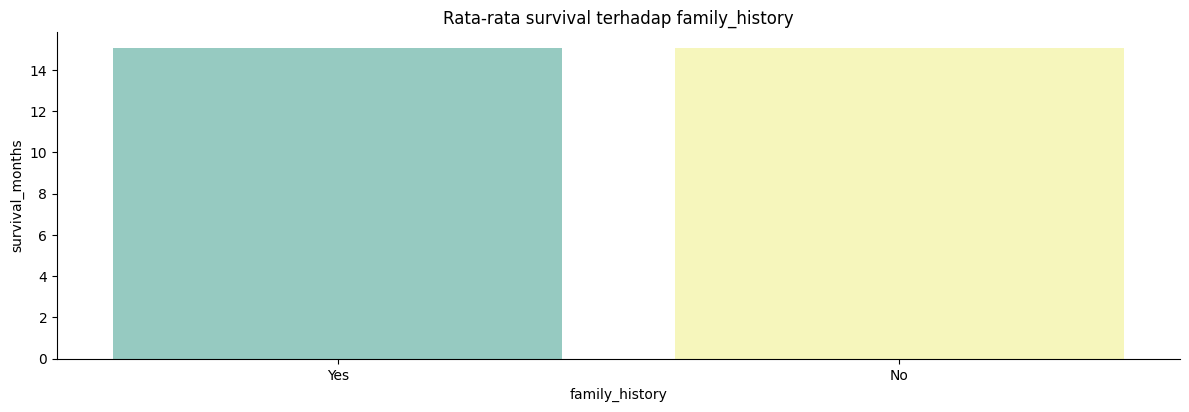

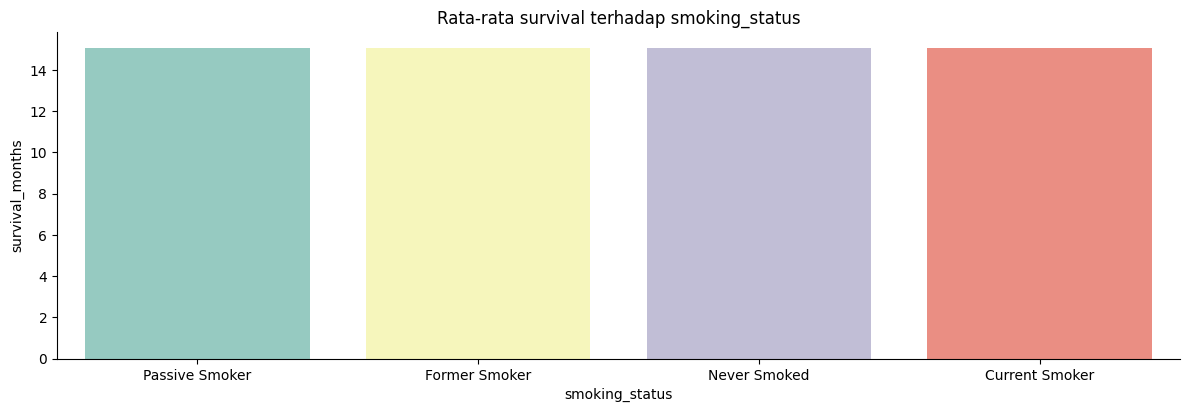

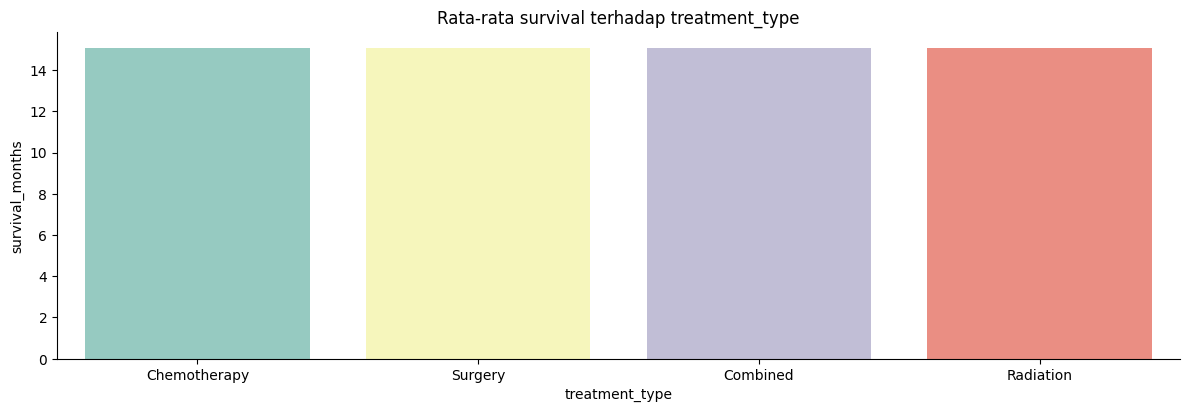

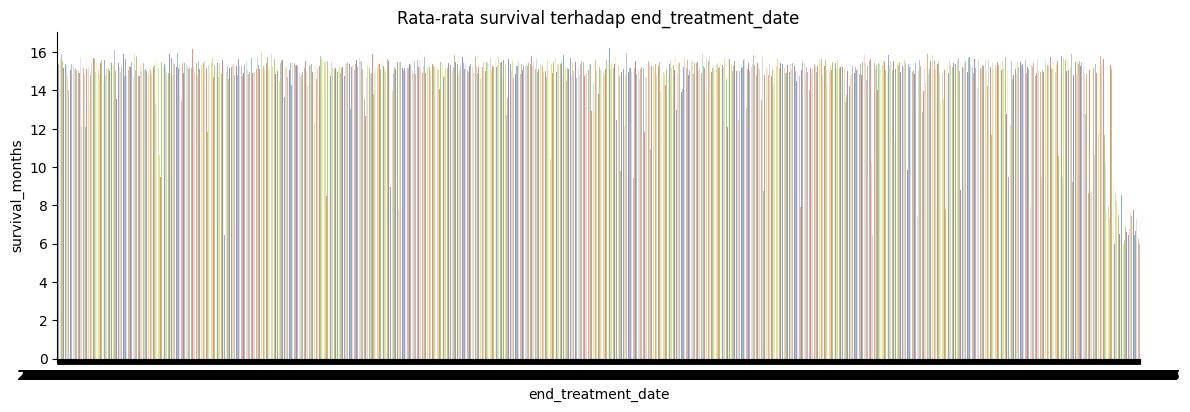

In [23]:
cat_features = cat_cols.to_list()
for col in cat_features:
    sns.catplot(x=col, y='survival_months', data=df, kind="bar", hue=col, legend=False, errorbar=None,
                dodge=False, height=4, aspect=3, palette="Set3")
    plt.title(f"Rata-rata survival terhadap {col}")
    plt.show()

Setelah melakukan feature engineering, hampir semua fitur kategori terhadap `survival_months` memiliki distribusi yang sama, kecuali pada fitur `cancer_stage`. Semakin rendah stadium pada pasien, maka perawatannya lebih lama. Hal ini memberikan interpretasi bahwa kanker dengan stadium semakin tinggi, semakin kecil harapan untuk selamat sesuai dengan distribusi pada fitur `survival`.

### Split Data
Pembagian dataset dilakukan menjadi 90% dataset pelatihan atau training dan 10% dataset merupakan data uji atau training. Pemisahan dataset ini mengecualikan fitur `diagnosis_date` dan `end_treatment_date` karena sudah diwakilkan oleh `survival_months` dan `survival_group`. Sedangkan target yang digunakan adalah `survived`.

In [24]:
# Split dataset dan menjadikan cancer_stage menjadi target

X = df.drop(columns=['survived', 'diagnosis_date', 'end_treatment_date'])
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Label Encoding
Mengubah nilai data kategorikal menjadi representasi numerik dilakukan agar komputer dapat lebih mudah mengenali fitur tersebut. Proses label encoding dilakukan secara manual pada fitur supaya lebih mudah dipantau. Proses ini dilakukan setelah proses spliting dataset (splitting) dilakukan untuk mencegah terjadinya kebocoran data (data leakage) pada model.

In [25]:
# Kembali menginisiasi kolom dengan tipe numerikal untuk standar scaler dan objek untuk label encoder
num_cols = ['age', 'bmi', 'cholesterol_level', 'survival_months']
cat_cols = ['gender', 'cancer_stage','survival_group', 'country', 'family_history', 'smoking_status', 'treatment_type', 'age_group', 'cholesterol_group', 'bmi_group']

In [26]:
def labelEncoding(df,columns):
  for col in columns:
    mapping = {val: i for i, val in enumerate(df[col].unique(), 1)}
    df[col] = df[col].map(mapping)
  return df[columns]

X_train[cat_cols] = labelEncoding(X_train,cat_cols)
X_test[cat_cols] = labelEncoding(X_test,cat_cols)

# Menampilkan data train dan test
print(f"Training Shape: {X_train.shape}, {y_train.shape}")
print(f"Test Shape: {X_test.shape}, {y_test.shape}")

Training Shape: (743716, 18), (743716,)
Test Shape: (82636, 18), (82636,)


### Normalisasi
Normalisasi data dilakukan mennggunakan standard scaler pada fitur numerik terutama bagi data yang memiliki selisih yang tinggi. Nilai numerik yang dilakukan normalisasi, yaitu `age`, `bmi`, `cholesterol_level`, dan `survival_months`.

In [27]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Feature Selection

Tidak semua fitur akan digunakan pada proses pembangunan model, mengingat terdapat 18 fitur pada data. Maka akan dilakukan seleksi fitur menggunakan teknik Lasso dan mempertimbangkan matriks korelasi (correlation matrix).

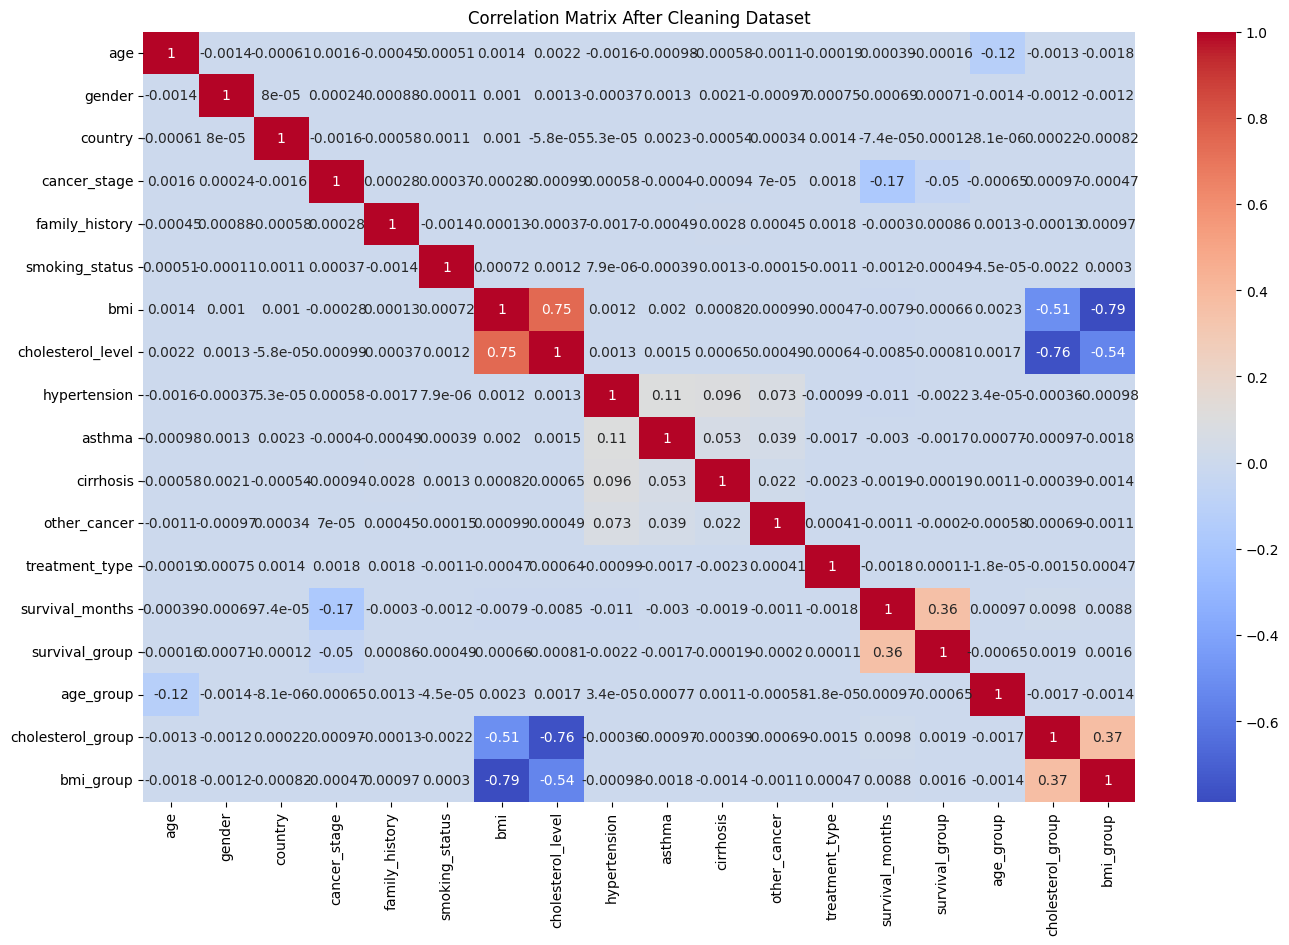

In [28]:
plt.figure(figsize=(16,10))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Cleaning Dataset')
plt.show()

Banyaknya jumlah fitur, distribusi yang hampir merata pada sebagian besar fitur, serta korelasi antar fitur yang rendah dapat menyebabkan model membuat prediksi yang terlalu umum (general) dan meningkatkan kompleksitas model. Oleh karena itu, dilakukan proses pemilihan fitur (feature selection) untuk meningkatkan kinerja model menggunakan teknik Lasso.

**Teknik Lasso** (*Least Absolute Shrinkage and Selection Operator*) merupakan salah satu teknik regresi dalam statistika dan machine learning untuk pilihan fitur. Cara kerja Lasso pada proyek ini, dengan menambahkan penalti berupa nilai absolut ke dalam fungsi loss senilai 0,0001 yang disebut dengan L1 regularization. Koefisien Lasso disetting tidak mendekati 0 sehingga fitur yang tidak penting dihilangkan dari model.

Kelebihan dari Lasso:
1. Dapat melakukan seleksi fitur pada model.
2. Membantu menangani overfitting.
3. Cocok untuk dataset dengan banyak fitur, terutama jika beberapa fitur tidak penting digunakan.

In [39]:
# Pakai Lasso untuk mengecilkan koefisien fitur tidak penting ke nol
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

# Lihat fitur yang dipilih
selected_features_lasso = X.columns[lasso.coef_ != 0]
print("Selected Features:", selected_features_lasso)

Selected Features: Index(['age', 'gender', 'country', 'cancer_stage', 'family_history',
       'cholesterol_level', 'asthma', 'cirrhosis', 'other_cancer', 'age_group',
       'bmi_group'],
      dtype='object')


In [40]:
selected_features_cols = selected_features_lasso.tolist()

# Mengambil data X train dan test yang sudah dipisahkan sebelumnya.
X_train_selected = X_train[selected_features_cols]
X_test_selected = X_test[selected_features_cols]

# Menampilkan data train dan test
print(f"Training Shape: {X_train_selected.shape}, {y_train.shape}")
print(f"Test Shape: {X_test_selected.shape}, {y_test.shape}")

Training Shape: (743716, 11), (743716,)
Test Shape: (82636, 11), (82636,)


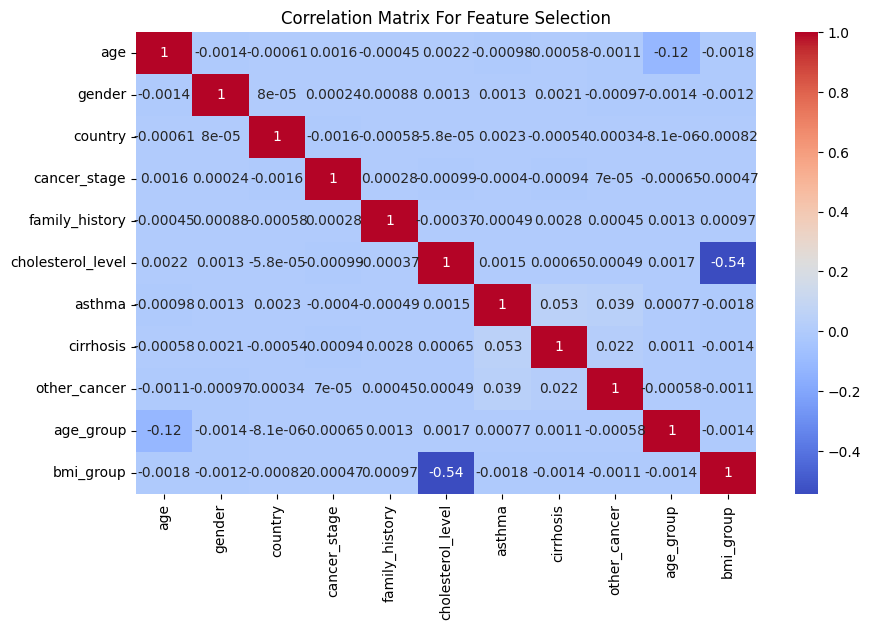

In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(X_train_selected.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix For Feature Selection')
plt.show()

Hasil dari Lasso pada proyek ini terhadap fitur target (`survived`), didapatkan 11 fitur, yaitu `age`, `gender`, `country`, `cancer_stage`, `family_history`, `cholesterol_level`, `asthma`, `cirrhosis`, `other_cancer`, `age_group`, dan `bmi_group`. Fitur-fitur ini berkorelasi satu sama lainnya berdasarkan teknik regresi dan dapat membantu menangani overfitting.

## 5. Building Model

Berdasarkan karakteristik data yang tidak linear serta jumlah data yang besar, dibutuhkan model dan algoritma yang cukup kompleks dan mampu menangani data dalam jumlah besar. Oleh karena itu, dilakukan percobaan menggunakan empat model berikut:

**1. Decision Tree**

Model Decision Tree bekerja dengan membentuk struktur pohon keputusan, di mana setiap cabang mewakili keputusan berdasarkan fitur tertentu, dan setiap daun mewakili output/klasifikasi. Dalam proyek ini, model menggunakan pemisahan berdasarkan Entropy untuk memilih fitur terbaik di setiap node. Karakteristik data yang terdiri dari fitur numerik dan kategorikal menjadikan model ini cukup cocok digunakan. Namun, Decision Tree cenderung overfitting dan kurang stabil terhadap perubahan data, terutama pada dataset besar. Parameter yang digunakan dalam proyek ini "random_state = 42" dan "max_depth = 10".

**2. Random Forest**

Random Forest merupakan pengembangan dari Decision Tree yang menggunakan teknik bagging, yaitu membangun banyak pohon keputusan secara acak dari subset data dan fitur yang berbeda. Setiap pohon memberikan prediksi, dan hasil akhir ditentukan dengan voting mayoritas. Hal ini membuat model lebih stabil, akurat, dan tahan terhadap overfitting dibandingkan Decision Tree tunggal. Parameter yang digunakan pada proyek ini adalah "random_forest = 42" dan "n_estimators = 50". Hasilnya, model menjadi lebih stabil dan akurat dibandingkan Decision Tree meskipun waktu latih menjadi lebih lama.


**3. K-Nearest Neighbor**

KNN adalah model berbasis instance-based learning yang memprediksi kelas berdasarkan sejumlah tetangga terdekat (dalam ruang fitur). Model ini menggunakan pengukuran jarak, dalam hal ini Minkowski Distance, untuk menentukan kedekatan antar data. Cocok digunakan untuk data non-linear seperti pada proyek ini, namun sensitif terhadap skala fitur sehingga memerlukan normalisasi. Model ini juga memiliki kelemahan dalam efisiensi karena proses prediksi memerlukan pencarian seluruh tetangga. Parameter yang digunakan "n_neighbors=5".

**4. Gradient Boosing**

Gradient Boosting adalah algoritma ensemble boosting yang membangun model secara bertahap, dengan setiap model baru mempelajari dan memperbaiki kesalahan dari model sebelumnya. Berbeda dari Random Forest yang membangun pohon secara paralel, Gradient Boosting membangunnya secara berurutan (iteratif), fokus pada mengurangi error (residual) dari prediksi sebelumnya. Model ini sangat efektif untuk data kompleks dan non-linear serta memiliki performa tinggi jika dituning dengan baik. Dalam proyek ini, parameter yang digunakan adalah "n_estimators = 50" dan "random_state=42". Data yang besar, non-liear, dan kompleks merupakan karakteristik data ini yang dapat diatasi oleh Gradient Boosting meskipun membutuhkan waktu dengan kompleksitas yang tinggi.

Proses data preparation sangat membantu proses modeling dan setiap langkahnya sangat berkaitan. Penambahan beberapa fitur membantu dalam menambahkan korelasi pada data, label encoding dan normalisasi data membantu data dikenali oleh model dan bekerja dengan lebih cepat. Pelaksanannya dilakukan setelah spliting data membantu model tidak bocor antara training dan testing. Pemilihan fitur melalui teknik Lasso dan mempertimbangkan *confussion matrix* membantu dalam reduksi data, mengurangi kompleksitas model, dan meningkatkan akurasi dengan menghindari data dengan korelasi yang tinggi. Penggunaan teknik ini juga secara langsung menjawab pernyataan permasalahan atas fitur apa saja yang berpengaruh kepada keselamatan dan diagnosis kanker paru-paru.



In [32]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train_selected, y_train)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)
rf_model.fit(X_train_selected, y_train)

# KNN
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn_model.fit(X_train_selected, y_train)

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_model.fit(X_train_selected, y_train)

GradientBoostingClassifier(n_estimators=50, random_state=42)

## 6. Evaluasi Model


Decission Tree Accuracy: 0.7796
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     64445
           1       0.30      0.00      0.00     18191

    accuracy                           0.78     82636
   macro avg       0.54      0.50      0.44     82636
weighted avg       0.67      0.78      0.68     82636



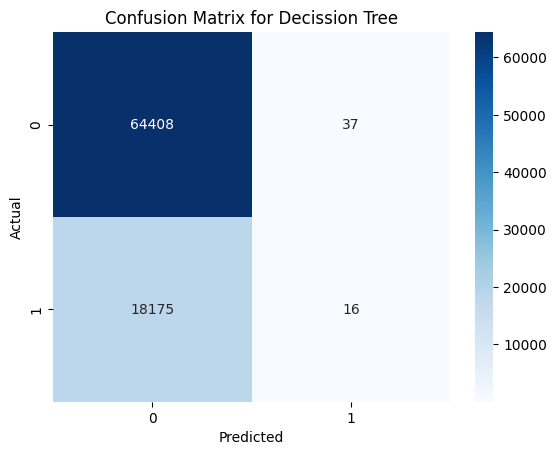


Random Forest Accuracy: 0.7689
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.98      0.87     64445
           1       0.22      0.02      0.04     18191

    accuracy                           0.77     82636
   macro avg       0.50      0.50      0.45     82636
weighted avg       0.66      0.77      0.69     82636



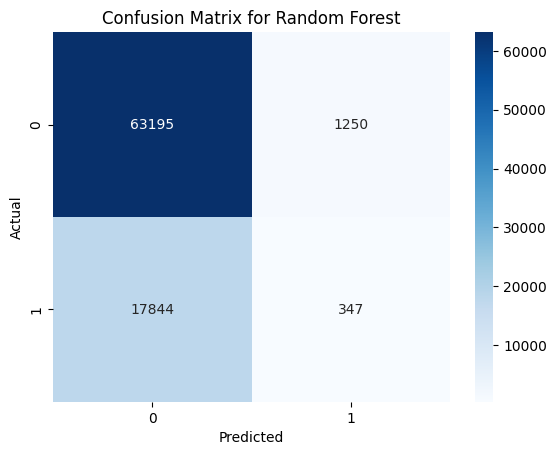


KNN Accuracy: 0.7375
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.92      0.85     64445
           1       0.22      0.07      0.11     18191

    accuracy                           0.74     82636
   macro avg       0.50      0.50      0.48     82636
weighted avg       0.66      0.74      0.68     82636



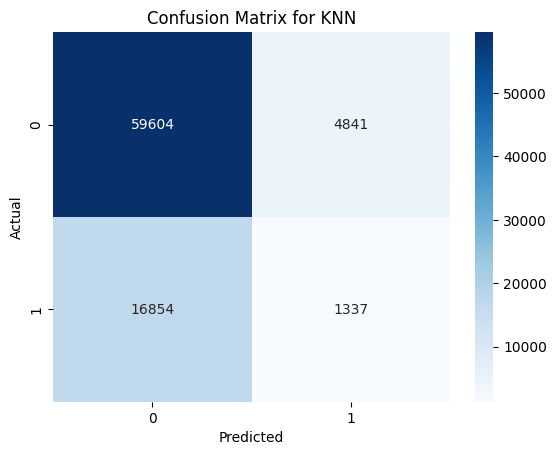


Gradient Boosting Accuracy: 0.7799
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88     64445
           1       1.00      0.00      0.00     18191

    accuracy                           0.78     82636
   macro avg       0.89      0.50      0.44     82636
weighted avg       0.83      0.78      0.68     82636



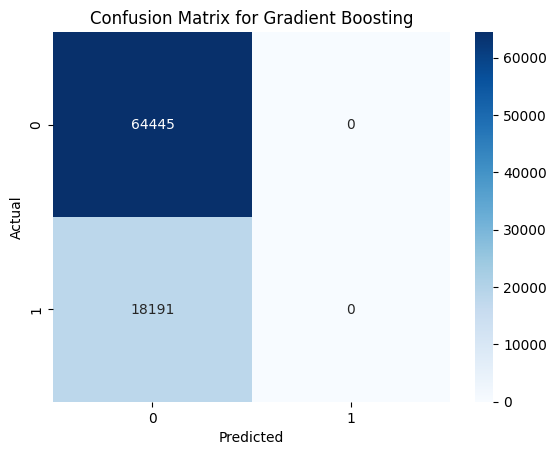

In [41]:
# Evaluasi model
models = {'Decission Tree':dt_model, 'Random Forest':rf_model, 'KNN':knn_model, 'Gradient Boosting':gb_model}

for name, model in models.items():
  y_pred = model.predict(X_test_selected)
  accuracy = accuracy_score(y_test, y_pred)
  print(f'\n{name} Accuracy: {accuracy:.4f}')
  print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))
  sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
  plt.title(f'Confusion Matrix for {name}')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

In [34]:
def evaluasi_model_train(models, X_train, y_train):
  results = []
  for name, model in models.items():
        y_pred = model.predict(X_train_selected)
        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred)
        recall = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)

        results.append([name, accuracy, precision, recall, f1])

  return pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Panggil fungsi
df_evaluasi_train = evaluasi_model_train(models, X_train_selected, y_train)
df_evaluasi_train

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Decission Tree,0.779983,0.796562,0.001697,0.003386
1,Random Forest,0.987345,0.985586,0.956542,0.970847
2,KNN,0.799000,0.629457,0.212937,0.318223
3,Gradient Boosting,0.779705,0.000000,0.000000,0.000000


In [35]:
def evaluasi_model_test(models, X_test, y_test):
    results = []

    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)

        results.append([name, accuracy, precision, recall, f1])

    return pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

df_evaluasi_test = evaluasi_model_test(models, X_test_selected, y_test)
df_evaluasi_test

,Model,Accuracy,Precision,Recall,F1 Score
0,Decission Tree,0.779612,0.301887,0.000880,0.001754
1,Random Forest,0.768938,0.217282,0.019075,0.035072
2,KNN,0.737463,0.216413,0.073498,0.109730
3,Gradient Boosting,0.779866,0.000000,0.000000,0.000000


Proses evaluasi pada proyek ini akan menggunakan akurasi, confusion matrix, dan f1-score. Mengingat rasio nilai pada target tidak merata dengan nilai 1 lebih sedikit, maka evaluasi model akan lebih memperhatikan prediksi ke nilai 1 atau true positif (maka dari itu metrik f1-score lebih cocok).

**1. Decision Tree**, Akurasi pada pelatihan dan prediksi data 0,779. Dari gambar di bawah, hanya 16 data yang diprediksi sebagai true positive. Diperoleh skor F1 pada uji 0,001754, di mana model masih dapat memprediksi data yang baru.

**2. Random Forest**, terdapat 347 data yang dapat diprediksi sebagai true positif pada model ini. Model ini mendapatkan akurasi pelatihan mencapai 0,987 dan akurasi prediksi 0,768 sedangkan nilai F1 pada prediksi 0,035.

**3. KNN**, dapat memprediksi 1.337 data sebagai true positif. Mendapatkan akurasi pelatihan 0,799 dan akurasi prediksi 0,737. Model mendapatkan skor f1 pada pelatihan 0,318 dan prediksi 0,109. Nilai f1 pada model ini lebih besar daripada model lainnya dan nilai akurasi pada pelatihan dan prediksi tidak jauh berbeda, sehingga model ini paling stabil diantara model lainnya.

**4. Gradient Boosting**, model ini tidak dapat mengenali data true positif sehingga mendapatkan skor f1 pada pelatihan dan pengujian adalah 0. Namun masih bisa memprediksi nilai true false, memiliki akurasi pelatihan dan pengujian sebesar 0,779.

Akurasi sudah menunjukkan hasil yang baik pada model Random Forest, namun pada nilai F1 data pengujian keseluruhan model belum menunjukkan hasil yang cukup baik tidak sampai 0,5. Artinya, pada seluruh model belum ada yang performanya baik dalam mengenali data yang baru. Hal ini dapat terjadi karena:
1. Persebaran pada data kategorikal terlalu menyebar dan model terlalu menggeneralisasi sehingga sulit untuk mengenali data, bahkan overfitting.
2. Meskipun persebaran data merata, target pada proyek ini yaitu "survived" memiliki sebaran yang tidak seimbang atau undersampling. Kasus pasien yang tidak selamat lebih banyak dibandingkan dengan pasien yang hidup, sehingga model lebih mengenali nilai True Negative atau pasien yang tidak selamat.


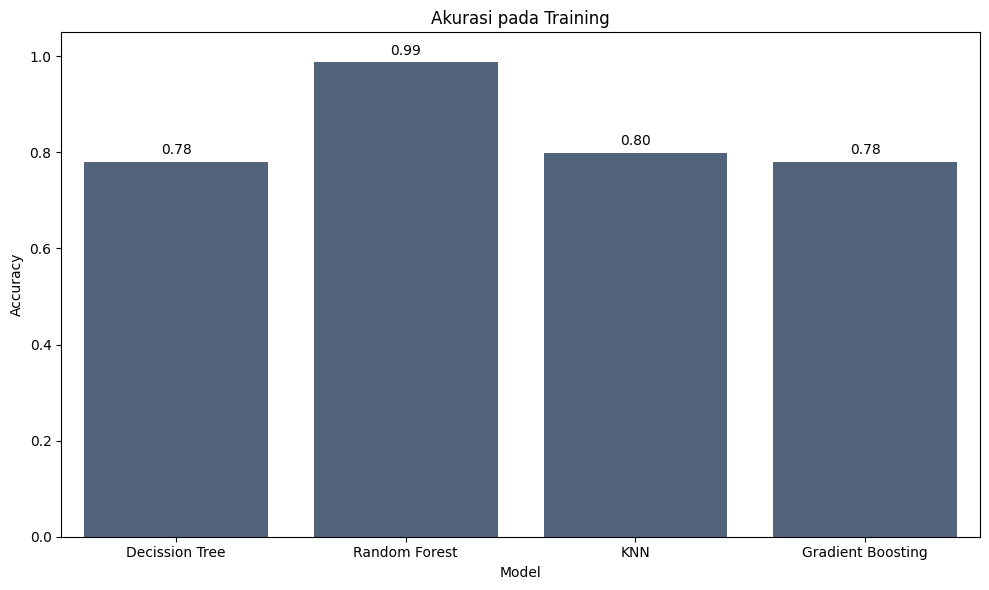

In [36]:
plt.figure(figsize=(10,6))
ax = sns.barplot(data = df_evaluasi_train, x='Model', y='Accuracy', color="#4b6382")
# Tambahkan nilai akurasi di atas setiap bar
for i, row in df_evaluasi_train.iterrows():
    ax.text(i, row['Accuracy'] + 0.01, f"{row['Accuracy']:.2f}",
            ha='center', va='bottom', color='black', fontsize=10)

plt.title('Akurasi pada Training')
plt.ylim(0, 1.05)
plt.tight_layout()
plt.show()

Berdasarkan gambar perbandingan akurasi di atas, model dengan akurasi tertinggi adalah Random Forest dan KNN. Selain akurasi, nilai F1 kedua model pada pelatihan dan prediksi menunjukkan nilai teringgi dengan jumlah kesalahan prediksi paling minimum dan paling banyak memprediksi nilai true positif. Model Random Forest memberikan nilai pelatihan yang sangat baik dan mampu mengenali data baru. Sedangkan model KNN lebih stabil pada data pelatihan dan mengenali data baru diantara semua model.

## 7. Conclusion
Berdasarkan hasil yang diperoleh pada proses EDA dan pengujian model terbaik untuk menentukan kejadian kanker paru-paru dapat menjawab pertanytaan permasalahan dan dapat disimpulkan bahwa:
1. Beberapa fitur yang terbukti paling berpengaruh terhadap diagnosis dan keselamatan pasien kanker paru  dapat dilakukan dengan menggunakan feature selection dengan teknik Lasso. Fitur-fitur tersebut adalah: "age", "gender", "country", "cancer_stage", "family_history", "cholesterol_level", "asthma", "cirrhosis", "other_cancer", "age_group", "bmi_group". Fitur country mencerminkan kondisi fasilitas kesehatan yang tersedia, sedangkan stadium kanker ("cancer_stage") menunjukkan korelasi kuat dengan harapan hidup—semakin tinggi stadiumnya, semakin rendah kemungkinan keselamatan pasien. Hal ini memperkuat pentingnya deteksi dini dan pola hidup sehat.
2. Ditemukan adanya korelasi antara keberlangsungan hidup dengan stadium kanker. Pasien dengan stadium yang lebih rendah cenderung memiliki survival rate yang lebih tinggi. Namun, jenis perawatan (treatment type) tidak menunjukkan hubungan signifikan dengan stadium, menandakan bahwa efektivitas pengobatan bisa sangat bervariasi dan perlu disesuaikan secara individual. Literatur menunjukkan bahwa operasi adalah pilihan utama, tetapi harus dipertimbangkan berdasarkan kondisi spesifik pasien.
3. Dari pengujian terhadap empat model machine learning: Decision Tree, Random Forest, KNN, dan Gradient Boosting, diperoleh dua model paling optimal:
   - **Random Forest** menunjukkan performa yang paling baik dari segi akurasi dan kestabilan prediksi secara keseluruhan.
   - **KNN** memberikan nilai F1 Score tertinggi diantara empat model lainnya untuk kelas positif, menunjukkan kemampuannya dalam mendeteksi pasien yang memiliki kemungkinan tinggi untuk bertahan hidup.